# HW3: Genetic Algorithm for Path Planning Problem

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import time
%matplotlib inline

In [2]:
DNA_SIZE = 10            # DNA length
POP_SIZE = 100           # population size
CROSS_RATE = 0.8         # mating probability (DNA crossover)
MUTATION_RATE = 0.003    # mutation probability
N_GENERATIONS = 200
X_BOUND = [0, 5]         # x upper and lower bounds
pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE)) #A 2D array where each row represents an individual's DNA, encoded as a binary sequence.

## Goal: 
Solve 100 sets of data X and find the maximum value **`F(X)`**
$$ F(x)= \sin(10x) \cdot x + \cos(2x) \cdot x $$

In [4]:
def F(x): return np.sin(10*x)*x + np.cos(2*x)*x

## HW3.1 Target Function
From x=0~5, draw the curve of this objective function

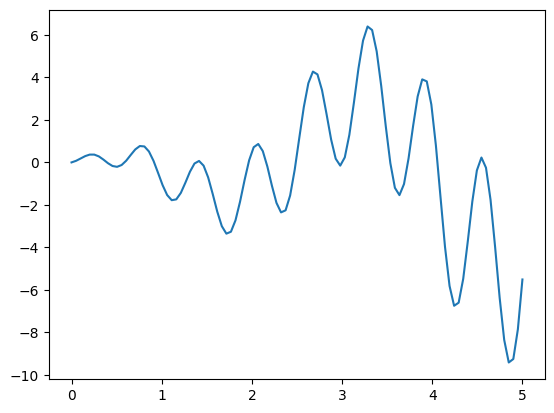

In [7]:
# TODO: draw the curve of this objective function
x_points = np.linspace(X_BOUND[0], X_BOUND[1], 100)
y_points = F(x_points)

plt.plot(x_points, y_points)

# Design Fitness Function
$$ fitness(pred) =\text{pred} + 10^{-3} - \min(\text{pred}) $$

This fitness function $pred + 10^{-3} - min(pred)$ is designed carefully to address common issues in algorithms and optimize the selection process. Here's a detailed explanation:

### **Explanation**:
1. **pred**: This represents the current fitness value (or prediction) of an individual in the population. The higher the fitness, the more likely the individual will be selected in a genetic algorithm.

2. **$10^{-3}$**: This small constant is added to ensure that the fitness value never becomes zero. Even when the `pred` value is very small or equal to the minimum in the population, this small constant prevents the fitness from being zero. It helps avoid numerical issues and ensures that each individual has a non-zero fitness, which is crucial in selection mechanisms that use fitness-based probabilities.

3. $- \min(\text{pred})$: Subtracting the minimum fitness value of the population helps normalize the fitness values. By shifting all fitness values so that the minimum fitness becomes close to zero, this highlights the difference between individuals. It ensures that the worst individuals are near zero fitness, making selection mechanisms more effective by promoting fitter individuals.

### **Why This Design?**

1. **Preventing Zero Fitness**: Adding a small constant ($10^{-3}$) ensures that no fitness value becomes zero or negative. This is important for algorithms that require positive fitness values, such as selection mechanisms in genetic algorithms that rely on proportional selection.

2. **Normalization**: By subtracting the minimum fitness value, the function ensures that the least fit individuals are near zero. This scaling helps selection mechanisms function more effectively, preventing the worst individuals from dominating and allowing fitter individuals to have a higher chance of selection.

3. **Fine Adjustment**: The addition of $10^{-3}$ is a small adjustment to ensure that no individual has exactly zero fitness, which is important for algorithms that require positive probabilities for selection.

### **Summary**:

This fitness function is designed to:
- Normalize fitness values by subtracting the minimum fitness.
- Ensure no individual has zero or negative fitness by adding a small constant.
- Smoothly scale fitness values to make sure selection mechanisms (like in genetic algorithms) work effectively, increasing the likelihood of selecting fitter individuals.

## You can also design other fitness functions.

## HW3.2 Fitness Function
Write the Fitness Function:
$$ \text{pred} + 10^{-3} - \min(\text{pred}) $$

In [8]:
def get_fitness(pred: float, all_preds: list[float]) -> float: 
    # TODO: Write the Fitness Function and return the fitness value
    return pred + 1e-3 - min(all_preds)

## HW3.3 Representation
Design a function **`translateDNA(pop)`** to convert binary-encoded DNA (gene sequences) into a real number, used in genetic algorithms to map binary genes to a value within a specified range.

### **Input**:
- **`pop`**: A 2D array where each row represents an individual's DNA, encoded as a binary sequence.

### **Output**:
- A 1D array of real values, where the binary DNA has been converted to real numbers and scaled according to `X_BOUND[1]`.

### **Explanation**:
- The function converts the binary DNA representation into a real number by treating the binary sequence as a number in base-2, normalizing it by dividing by the maximum possible value, and scaling it to fit within the specified bounds (`X_BOUND[1]`).

In [ ]:
def translateDNA(pop): 
    # TODO: Write the translateDNA Function and return a 1D array of real values
    maximum_value = pow(2, DNA_SIZE) - 1
    real_number_vector = np.array([pow(2,i) for i in range(DNA_SIZE-1, -1, -1)])    # [512, 256, ..., 2, 1]
    pop_real_number = np.matmul(pop, real_number_vector)
    normalized_pop_real_number = pop_real_number / maximum_value
    scaled_pop_real_number = normalized_pop_real_number * X_BOUND[1]
    return scaled_pop_real_number

# Testing
# test_pop = np.random.randint(2, size=(2, DNA_SIZE))
# translateDNA(test_pop)

# HW3.4 Selection
Write a function **`select(pop, fitness)`** to implement a natural selection process in a genetic algorithm. It selects individuals from the population (pop) based on their fitness values (fitness), where fitter individuals have a higher probability of being selected for the next generation. 

Tip: You can normalize fitness into a probability distribution using `p = fitness / fitness.sum()`, ensuring that the sum of all individuals equals 1. The higher the fitness of an individual, the greater its chance of being selected, but every individual still has a chance of being chosen.
### **Input**:
1. **`pop`**: A 2D array representing the population, where each row is an individual's genetic sequence (DNA).
2. **`fitness`**: A 1D array representing the fitness values of the individuals in the population.

### **Output**:
- **`pop[idx]`**: A 2D array representing the selected population for the next generation, with individuals chosen based on their fitness values.

In [39]:
def select(pop: np.ndarray, fitness: np.ndarray) -> np.ndarray:   # nature selection wrt pop's fitness
    # TODO: Write the select Function and return a 2D array representing the selected population for the next generation
    sum_of_fitness = np.sum(fitness)
    probabilities = fitness / sum_of_fitness    # list of probability [0.2, 0.9, ..., 0.3]
    selected_idx = np.random.rand(len(probabilities)) < probabilities   # random selected by probability [0, 1, ..., 1]
    return pop[selected_idx]    # return the selected population

# Test population: let's assume each individual in the population has 3 features (3D space)
# pop = np.array([
#     [0.1, 0.2, 0.3],
#     [0.4, 0.5, 0.6],
#     [0.7, 0.8, 0.9],
#     [1.0, 1.1, 1.2],
#     [1.3, 1.4, 1.5]
# ])

# # Corresponding fitness values for each individual in the population
# fitness = [0.2, 0.9, 0.3, 0.8, 0.6]

# # Call the selection function
# selected_pop = select(pop, fitness)

# # Print the selected population
# print("Original Population:")
# print(pop)

# print("\nFitness values:")
# print(fitness)

# print("\nSelected Population (based on fitness probabilities):")
# print(selected_pop)

## HW3.5 Crossover
Write a function **`crossover(parent, pop)`** to implement the crossover (mating) process in a genetic algorithm. During crossover, two individuals exchange some of their genetic material to produce a new individual (child).
### **Input**:
1. **`parent`**: A 1D array representing an individual's genetic sequence (DNA).
2. **`pop`**: A 2D array representing the population, where each row is an individual.

### **Output**:
- **`parent`**: A 1D array, either modified (after crossover) or unmodified (if no crossover occurs).


In [8]:
def crossover(parent, pop):
    # TODO: Write the crossover Function and return a 1D array of parent
    

## HW3.6 Mutation
Write a function **`mutate()`** to perform a mutation operation in a genetic algorithm, which introduces small random changes in an individual's genetic sequence (DNA). Mutation helps maintain genetic diversity within the population.
### **Input**:
1. **`child`**: A 1D array representing an individual's genetic sequence (DNA), where each element is typically a binary value (0 or 1).

### **Output**:
- **`child`**: The modified genetic sequence after mutation, where certain genes may have flipped from 0 to 1 or from 1 to 0 based on the mutation rate.

### **Explanation**:
- The function iterates through each gene in the `child` DNA sequence. For each gene, with a probability determined by `MUTATION_RATE`, the gene may undergo mutation, flipping from 0 to 1 or from 1 to 0. This introduces genetic diversity into the population.


In [9]:
def mutate(child):
    # TODO: Write the mutation Function and return the child
    

## HW3.7 GA Function
Write a function GA() that implements a basic genetic algorithm (GA) that evolves a population over many generations to optimize the function F() based on the function you wrote above.
### **Input**:

1. **`N_GENERATIONS`**: An integer representing the number of generations (iterations) the genetic algorithm will run.
2. **`pop`**: A 2D array where each row represents an individual's DNA sequence encoded in binary (the initial population).

### **Output**:
- **`performance`**: A list that records the sum of fitness values (`F_values.sum()`) for each generation. This allows the user to analyze how the overall fitness of the population evolves across generations. Additionally, for each generation, a scatter plot is generated to visually represent the solutions' progression.
- **`time_per_iteration`**: A list used to record the computation time for each generation.

In [10]:
performance = []
time_per_iteration = []

def GA(N_GENERATIONS, pop):    
    # TODO: Write the GA Function that evolves a population over many generations to optimize the function F() based on the function you wrote above.

    return performance, time_per_iteration  # Return both performance and time per generation


Generation:  0
Max F_values:  -64.68326722428246


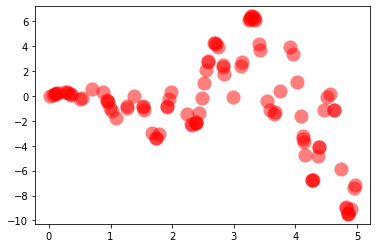

Time for Generation 0: 0.2466 seconds
Generation:  1
Max F_values:  21.945642550394012


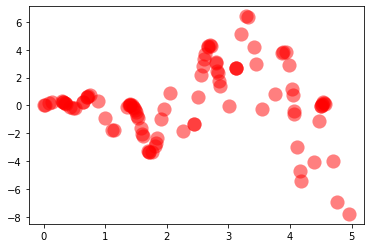

Time for Generation 1: 0.2889 seconds
Generation:  2
Max F_values:  54.075841372926824


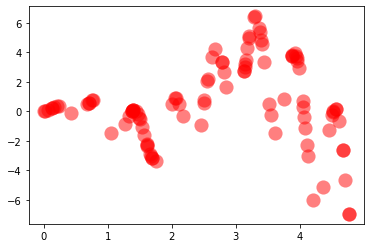

Time for Generation 2: 0.3200 seconds
Generation:  3
Max F_values:  128.69857480071482


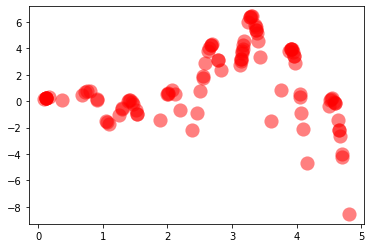

Time for Generation 3: 0.2877 seconds
Generation:  4
Max F_values:  210.27380724955057


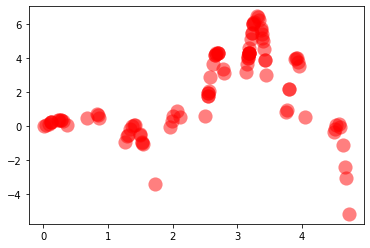

Time for Generation 4: 0.2815 seconds
Generation:  5
Max F_values:  271.7926906134896


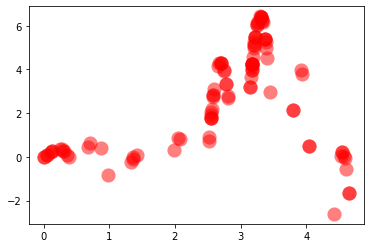

Time for Generation 5: 0.2579 seconds
Generation:  6
Max F_values:  354.0091494690941


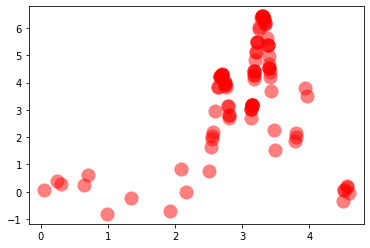

Time for Generation 6: 0.2813 seconds
Generation:  7
Max F_values:  443.37997798177196


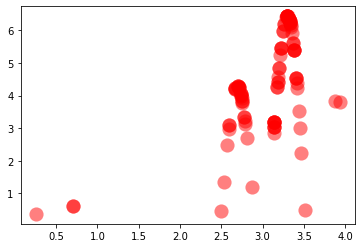

Time for Generation 7: 0.2975 seconds
Generation:  8
Max F_values:  506.38073019887497


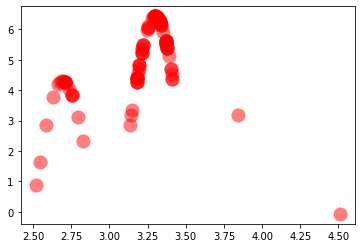

Time for Generation 8: 0.3252 seconds
Generation:  9
Max F_values:  527.0514475927224


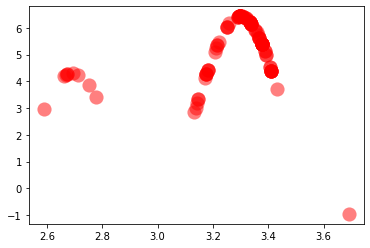

Time for Generation 9: 0.2860 seconds
Generation:  10
Max F_values:  528.856951631378


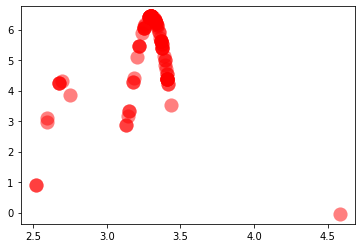

Time for Generation 10: 0.2838 seconds
Generation:  11
Max F_values:  550.2673922869453


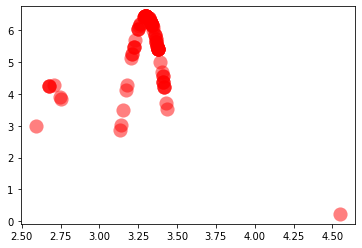

Time for Generation 11: 0.2824 seconds
Generation:  12
Max F_values:  553.6314297141403


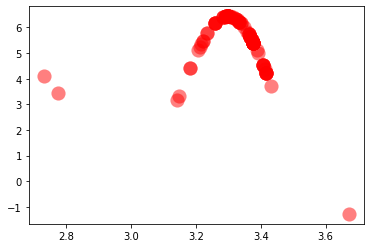

Time for Generation 12: 0.2621 seconds
Generation:  13
Max F_values:  562.6434683488555


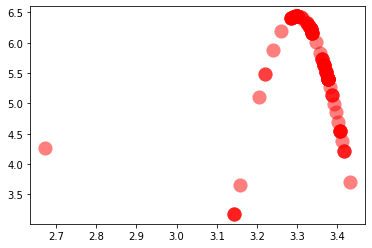

Time for Generation 13: 0.3384 seconds
Generation:  14
Max F_values:  579.1390365107422


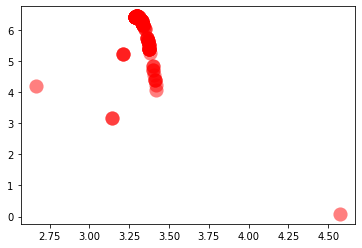

Time for Generation 14: 0.2828 seconds
Generation:  15
Max F_values:  590.6075047241978


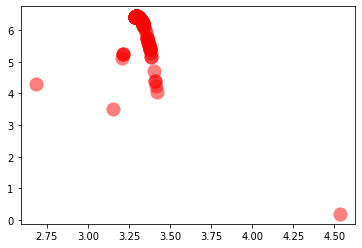

Time for Generation 15: 0.2592 seconds
Generation:  16
Max F_values:  594.7308333485012


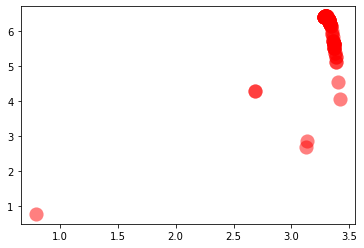

Time for Generation 16: 0.2886 seconds
Generation:  17
Max F_values:  598.3639238553772


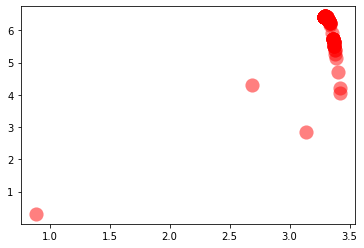

Time for Generation 17: 0.2843 seconds
Generation:  18
Max F_values:  606.4336539111848


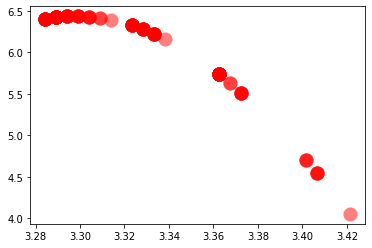

Time for Generation 18: 0.3144 seconds
Generation:  19
Max F_values:  627.7010571179894


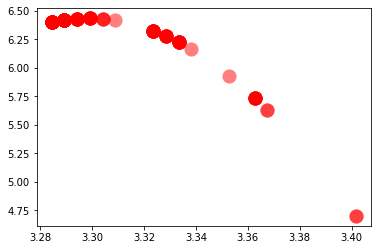

Time for Generation 19: 0.2908 seconds
Generation:  20
Max F_values:  618.2833588539344


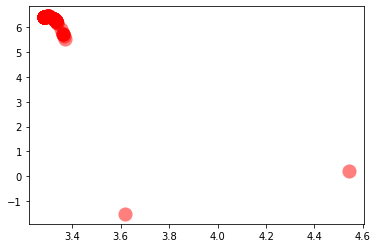

Time for Generation 20: 0.2597 seconds
Generation:  21
Max F_values:  619.5695001629784


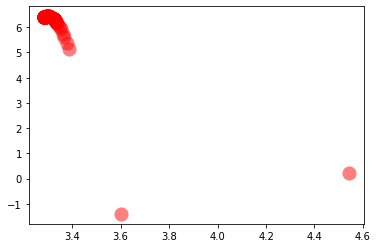

Time for Generation 21: 0.2970 seconds
Generation:  22
Max F_values:  619.5807036134211


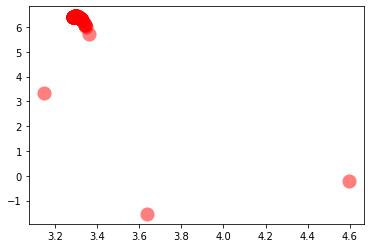

Time for Generation 22: 0.3021 seconds
Generation:  23
Max F_values:  622.2458362094502


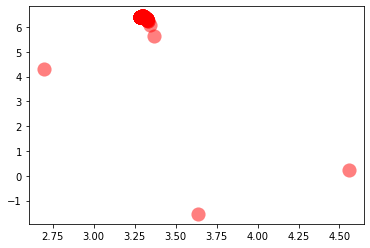

Time for Generation 23: 0.3236 seconds
Generation:  24
Max F_values:  626.232654853958


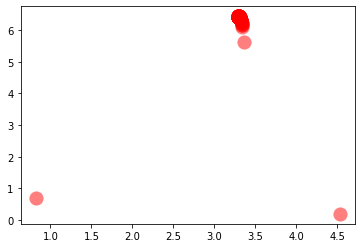

Time for Generation 24: 0.3589 seconds
Generation:  25
Max F_values:  631.0751063559978


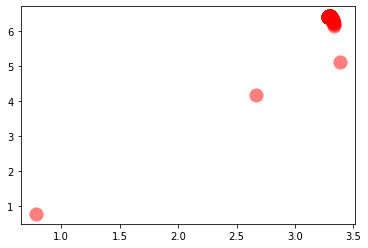

Time for Generation 25: 0.3282 seconds
Generation:  26
Max F_values:  632.2447319008537


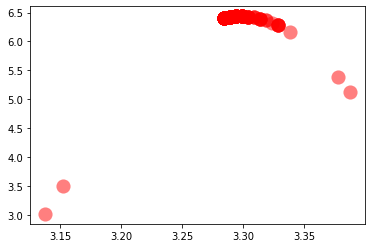

Time for Generation 26: 0.2813 seconds
Generation:  27
Max F_values:  628.419635549296


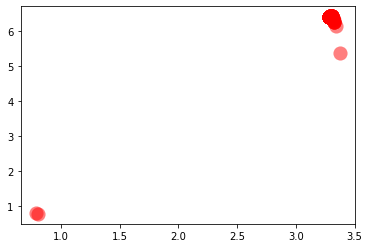

Time for Generation 27: 0.2948 seconds
Generation:  28
Max F_values:  635.8272661824473


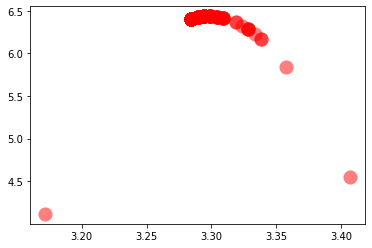

Time for Generation 28: 0.2820 seconds
Generation:  29
Max F_values:  641.1026680600846


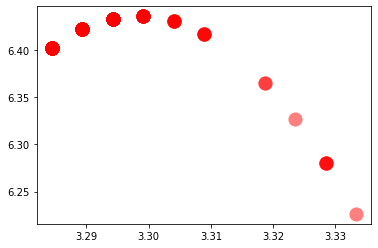

Time for Generation 29: 0.2801 seconds
Generation:  30
Max F_values:  634.0397136660692


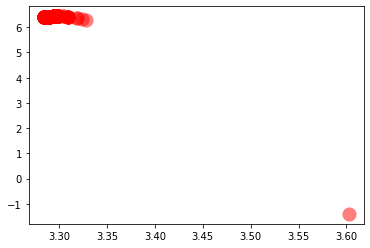

Time for Generation 30: 0.2895 seconds
Generation:  31
Max F_values:  629.6175039144642


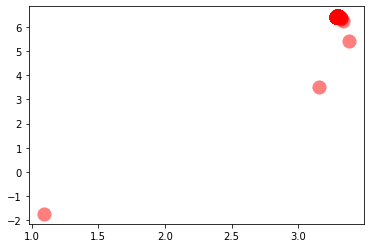

Time for Generation 31: 0.2705 seconds
Generation:  32
Max F_values:  629.1978455307908


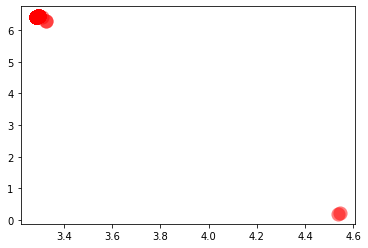

Time for Generation 32: 0.2749 seconds
Generation:  33
Max F_values:  633.6742868149662


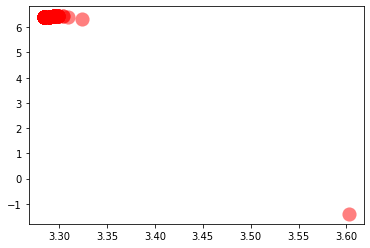

Time for Generation 33: 0.2638 seconds
Generation:  34
Max F_values:  632.3787443688747


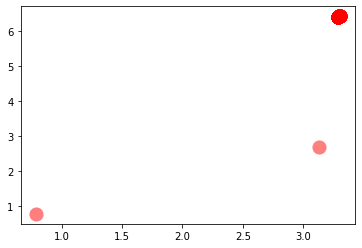

Time for Generation 34: 0.2979 seconds
Generation:  35
Max F_values:  640.5740710331497


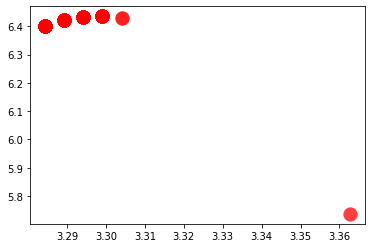

Time for Generation 35: 0.3468 seconds
Generation:  36
Max F_values:  630.8520483349658


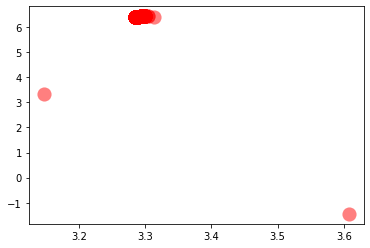

Time for Generation 36: 0.2635 seconds
Generation:  37
Max F_values:  624.0624230955774


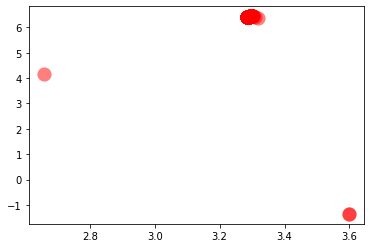

Time for Generation 37: 0.3107 seconds
Generation:  38
Max F_values:  636.1538033701223


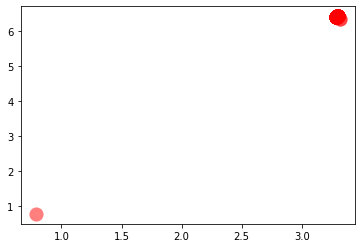

Time for Generation 38: 0.2696 seconds
Generation:  39
Max F_values:  637.6057113021662


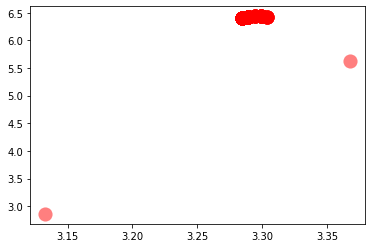

Time for Generation 39: 0.2785 seconds
Generation:  40
Max F_values:  641.7382315391826


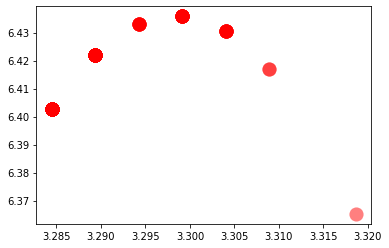

Time for Generation 40: 0.2942 seconds
Generation:  41
Max F_values:  637.9661796781397


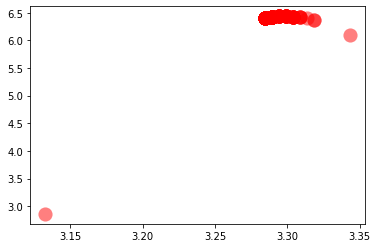

Time for Generation 41: 0.3042 seconds
Generation:  42
Max F_values:  630.7394550670408


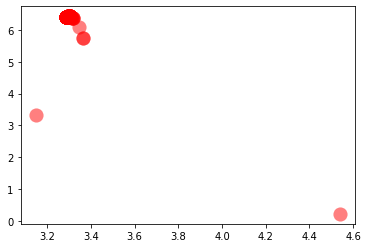

Time for Generation 42: 0.2899 seconds
Generation:  43
Max F_values:  622.2741340150213


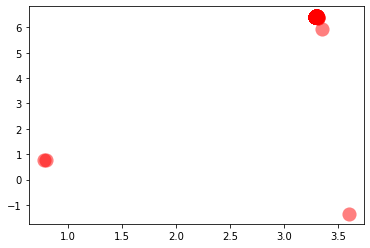

Time for Generation 43: 0.2853 seconds
Generation:  44
Max F_values:  626.4504217603361


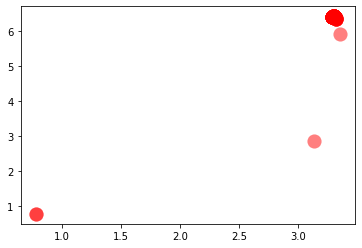

Time for Generation 44: 0.2658 seconds
Generation:  45
Max F_values:  635.7947265013393


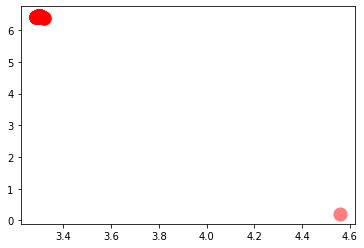

Time for Generation 45: 0.2909 seconds
Generation:  46
Max F_values:  641.8482500521865


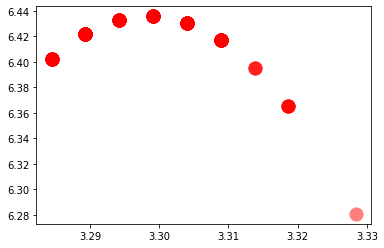

Time for Generation 46: 0.3263 seconds
Generation:  47
Max F_values:  629.411676062645


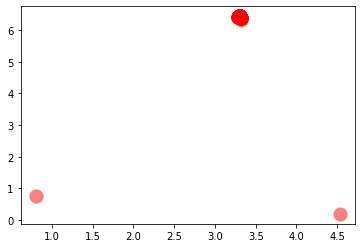

Time for Generation 47: 0.2727 seconds
Generation:  48
Max F_values:  630.1802988431376


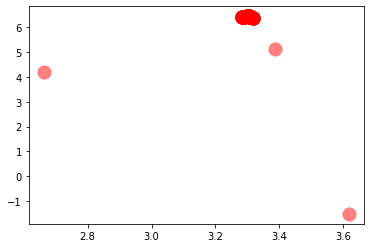

Time for Generation 48: 0.2975 seconds
Generation:  49
Max F_values:  636.1089343217473


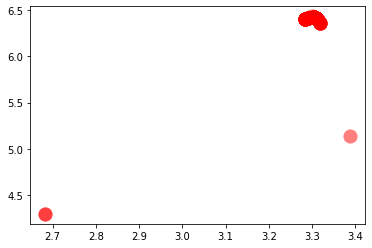

Time for Generation 49: 0.2874 seconds
Generation:  50
Max F_values:  640.8515621524818


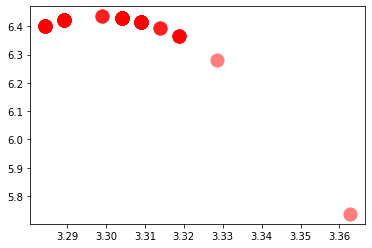

Time for Generation 50: 0.3030 seconds
Generation:  51
Max F_values:  634.839405026458


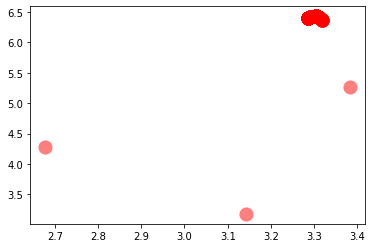

Time for Generation 51: 0.2687 seconds
Generation:  52
Max F_values:  625.5709886915516


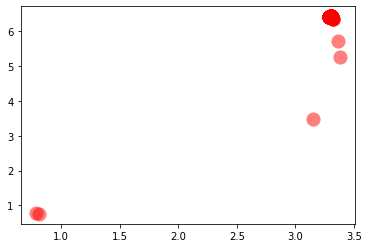

Time for Generation 52: 0.2674 seconds
Generation:  53
Max F_values:  627.9813103003489


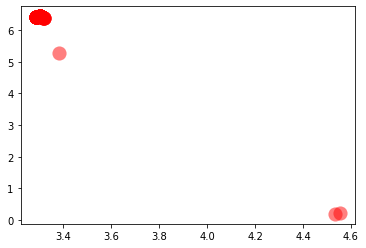

Time for Generation 53: 0.2909 seconds
Generation:  54
Max F_values:  627.249317040448


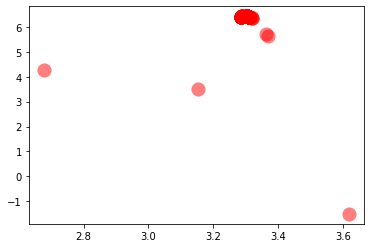

Time for Generation 54: 0.2516 seconds
Generation:  55
Max F_values:  635.9026092103959


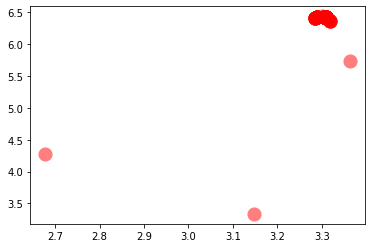

Time for Generation 55: 0.2685 seconds
Generation:  56
Max F_values:  637.4132627771289


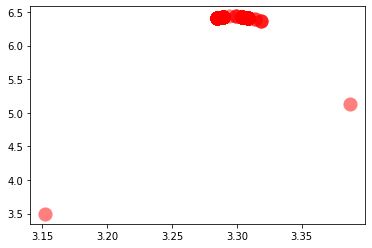

Time for Generation 56: 0.2908 seconds
Generation:  57
Max F_values:  638.7452571631023


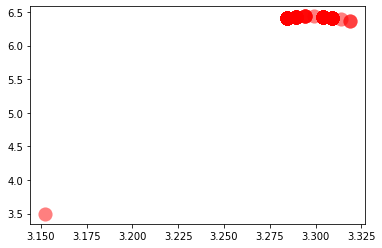

Time for Generation 57: 0.3421 seconds
Generation:  58
Max F_values:  630.6353734295035


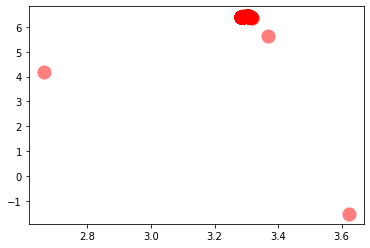

Time for Generation 58: 0.2636 seconds
Generation:  59
Max F_values:  637.4868494987265


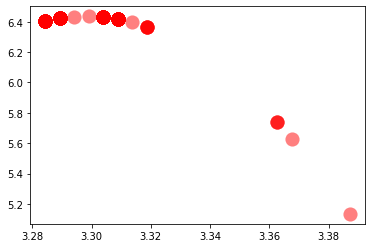

Time for Generation 59: 0.2771 seconds
Generation:  60
Max F_values:  632.7016706332535


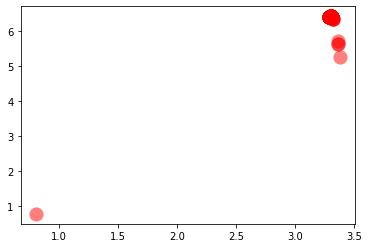

Time for Generation 60: 0.2762 seconds
Generation:  61
Max F_values:  629.2544569432101


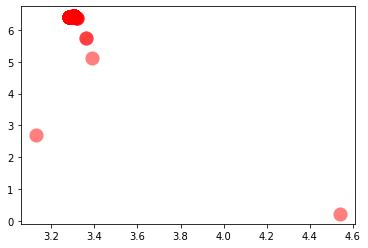

Time for Generation 61: 0.3146 seconds
Generation:  62
Max F_values:  640.5538323806243


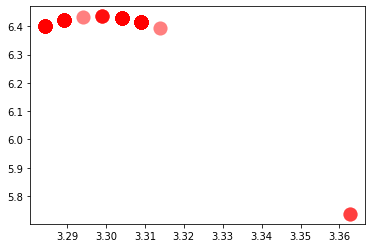

Time for Generation 62: 0.3327 seconds
Generation:  63
Max F_values:  641.6426927133573


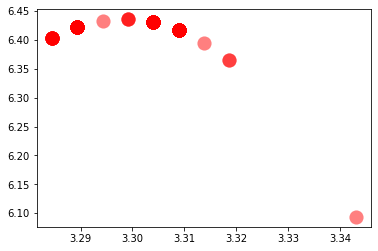

Time for Generation 63: 0.2627 seconds
Generation:  64
Max F_values:  641.9452461181444


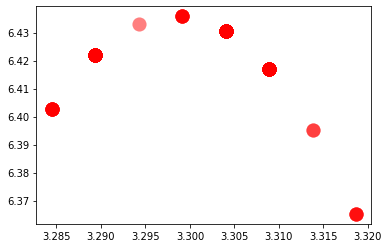

Time for Generation 64: 0.3408 seconds
Generation:  65
Max F_values:  635.6944729434382


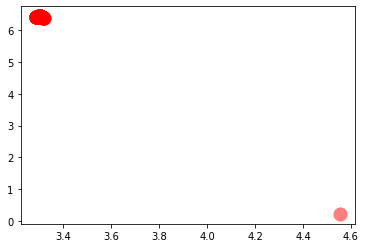

Time for Generation 65: 0.2821 seconds
Generation:  66
Max F_values:  634.2174002619806


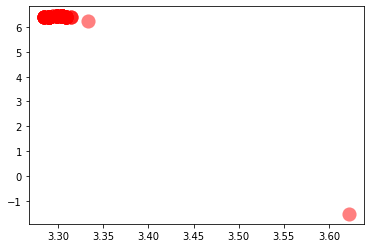

Time for Generation 66: 0.3351 seconds
Generation:  67
Max F_values:  635.9669232877566


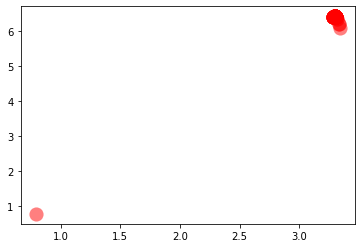

Time for Generation 67: 0.3239 seconds
Generation:  68
Max F_values:  639.27625140752


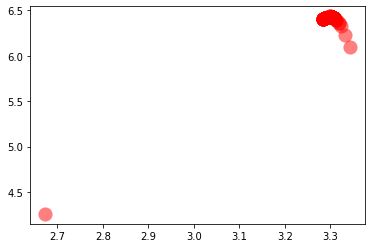

Time for Generation 68: 0.3235 seconds
Generation:  69
Max F_values:  641.6267327010158


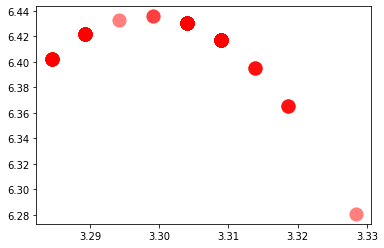

Time for Generation 69: 0.3103 seconds
Generation:  70
Max F_values:  626.571420964257


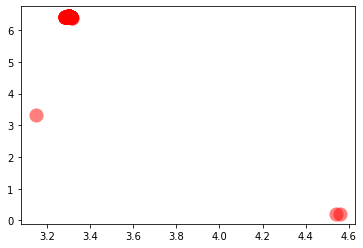

Time for Generation 70: 0.3328 seconds
Generation:  71
Max F_values:  639.1157888334109


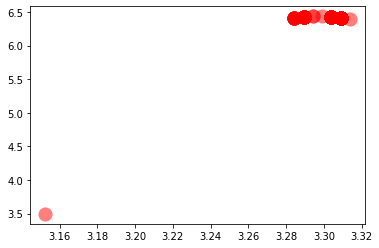

Time for Generation 71: 0.3053 seconds
Generation:  72
Max F_values:  638.4141740895551


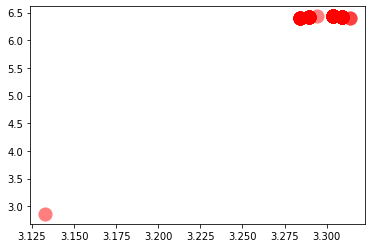

Time for Generation 72: 0.3330 seconds
Generation:  73
Max F_values:  632.2117077825575


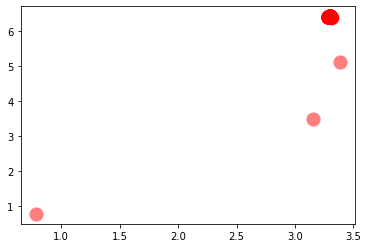

Time for Generation 73: 0.2730 seconds
Generation:  74
Max F_values:  628.475089892754


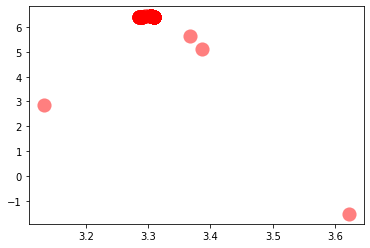

Time for Generation 74: 0.2644 seconds
Generation:  75
Max F_values:  636.2993346321766


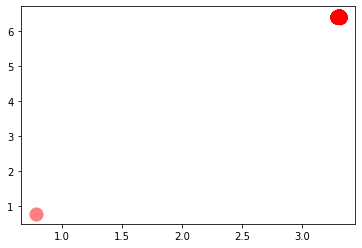

Time for Generation 75: 0.2895 seconds
Generation:  76
Max F_values:  634.3412633199792


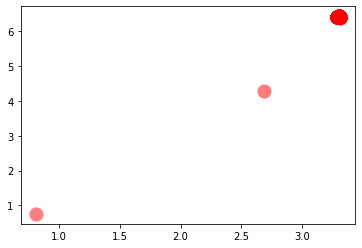

Time for Generation 76: 0.2970 seconds
Generation:  77
Max F_values:  628.9075723464632


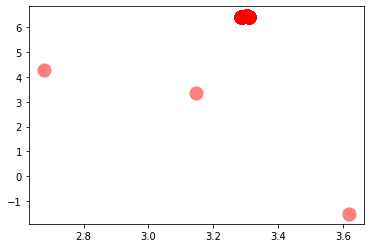

Time for Generation 77: 0.2934 seconds
Generation:  78
Max F_values:  639.9858742693111


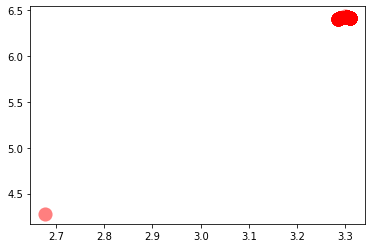

Time for Generation 78: 0.2809 seconds
Generation:  79
Max F_values:  642.0739042503158


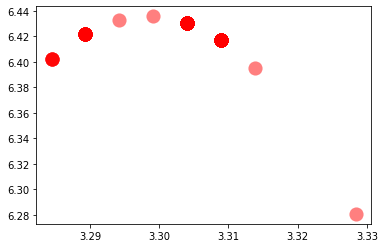

Time for Generation 79: 0.3415 seconds
Generation:  80
Max F_values:  623.0341157073738


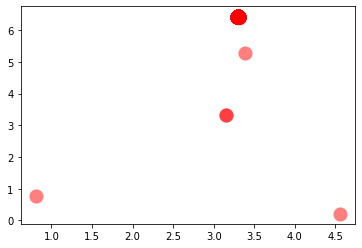

Time for Generation 80: 0.3369 seconds
Generation:  81
Max F_values:  641.7985939680284


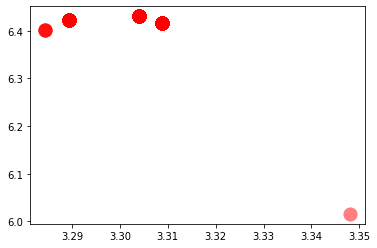

Time for Generation 81: 0.3219 seconds
Generation:  82
Max F_values:  632.5037721591491


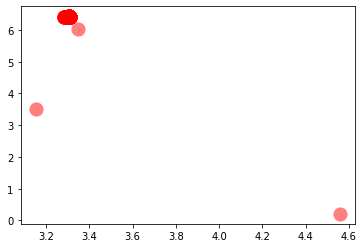

Time for Generation 82: 0.2919 seconds
Generation:  83
Max F_values:  639.6935992746304


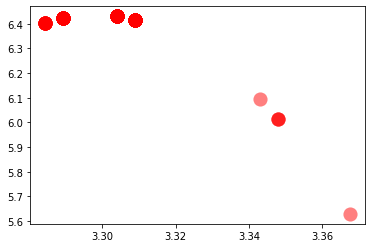

Time for Generation 83: 0.2740 seconds
Generation:  84
Max F_values:  636.6041673643234


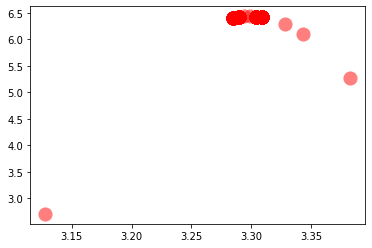

Time for Generation 84: 0.2928 seconds
Generation:  85
Max F_values:  636.9508373662295


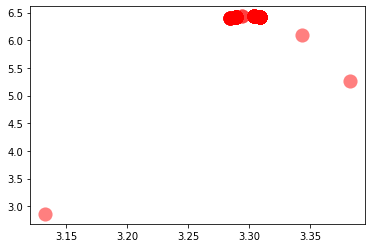

Time for Generation 85: 0.3127 seconds
Generation:  86
Max F_values:  640.6311398934099


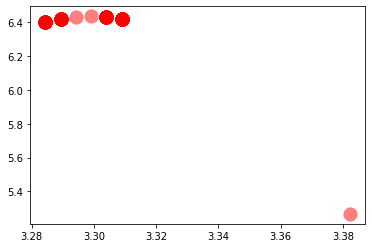

Time for Generation 86: 0.2909 seconds
Generation:  87
Max F_values:  627.9365232481608


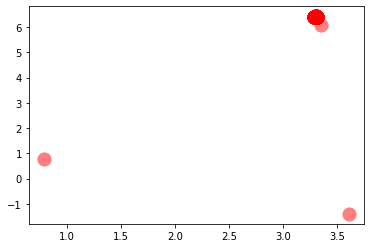

Time for Generation 87: 0.2916 seconds
Generation:  88
Max F_values:  618.6036133891276


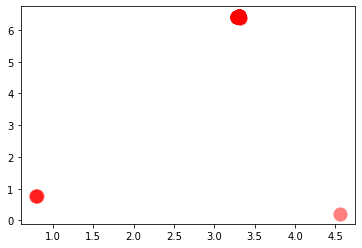

Time for Generation 88: 0.3017 seconds
Generation:  89
Max F_values:  633.2042672581599


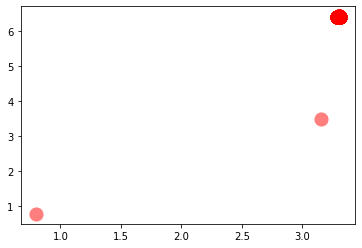

Time for Generation 89: 0.2720 seconds
Generation:  90
Max F_values:  631.8408266420538


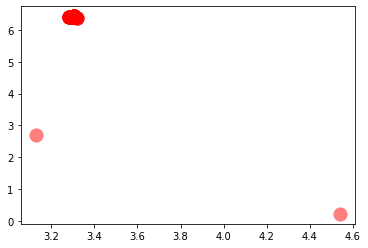

Time for Generation 90: 0.3407 seconds
Generation:  91
Max F_values:  638.9327428440001


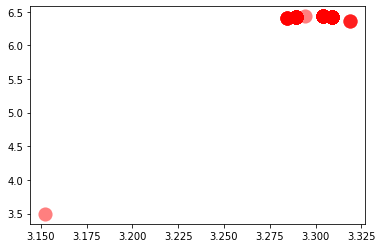

Time for Generation 91: 0.2885 seconds
Generation:  92
Max F_values:  627.6652036758092


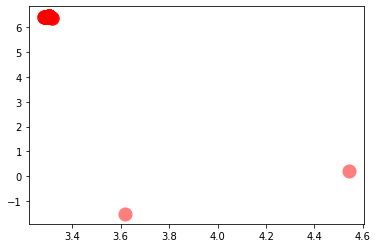

Time for Generation 92: 0.2639 seconds
Generation:  93
Max F_values:  641.8507863379446


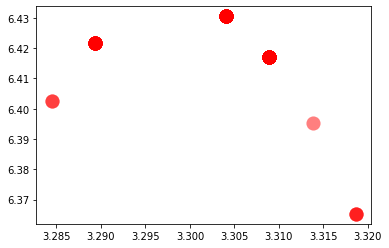

Time for Generation 93: 0.3404 seconds
Generation:  94
Max F_values:  639.5385189682695


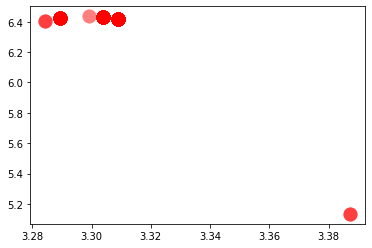

Time for Generation 94: 0.2708 seconds
Generation:  95
Max F_values:  625.0189881674353


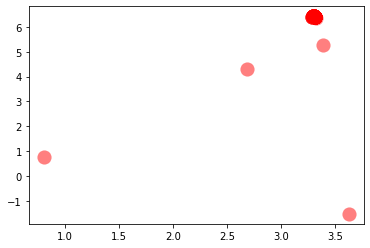

Time for Generation 95: 0.2798 seconds
Generation:  96
Max F_values:  634.6720438084096


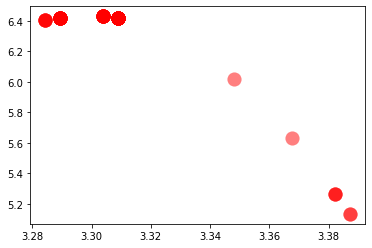

Time for Generation 96: 0.2959 seconds
Generation:  97
Max F_values:  638.317320131076


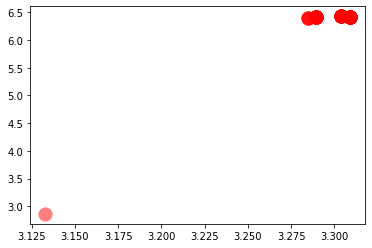

Time for Generation 97: 0.3207 seconds
Generation:  98
Max F_values:  635.6063931457138


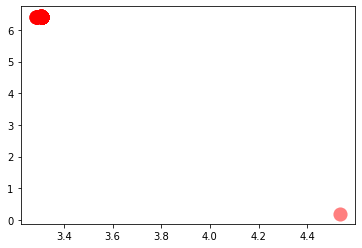

Time for Generation 98: 0.2614 seconds
Generation:  99
Max F_values:  627.601411549135


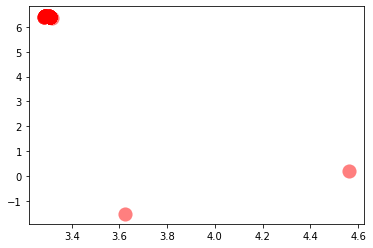

Time for Generation 99: 0.2910 seconds
Generation:  100
Max F_values:  638.1305987307962


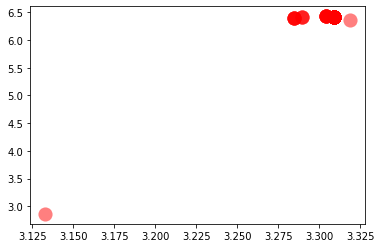

Time for Generation 100: 0.3289 seconds
Generation:  101
Max F_values:  641.7449928764129


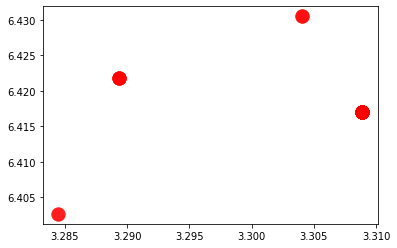

Time for Generation 101: 0.3332 seconds
Generation:  102
Max F_values:  639.655187389794


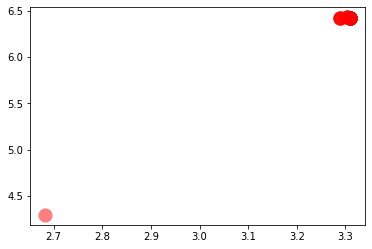

Time for Generation 102: 0.2882 seconds
Generation:  103
Max F_values:  634.9125907583364


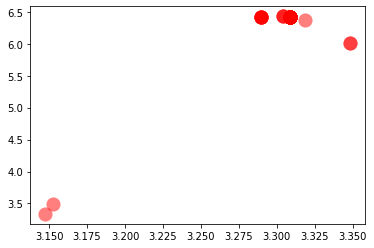

Time for Generation 103: 0.3124 seconds
Generation:  104
Max F_values:  640.9001084135043


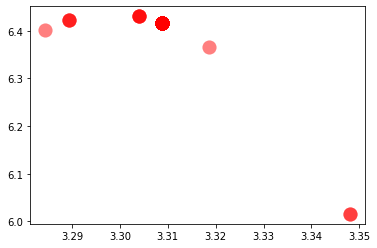

Time for Generation 104: 0.3130 seconds
Generation:  105
Max F_values:  634.2844917770731


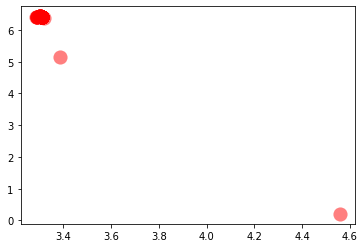

Time for Generation 105: 0.2730 seconds
Generation:  106
Max F_values:  627.8573940386873


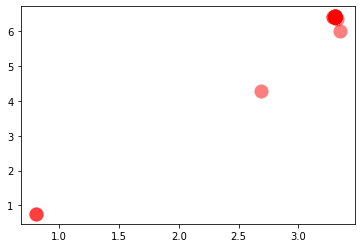

Time for Generation 106: 0.2817 seconds
Generation:  107
Max F_values:  634.8613714697276


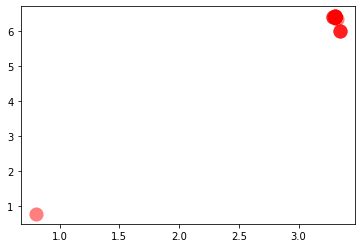

Time for Generation 107: 0.2703 seconds
Generation:  108
Max F_values:  630.0489908802263


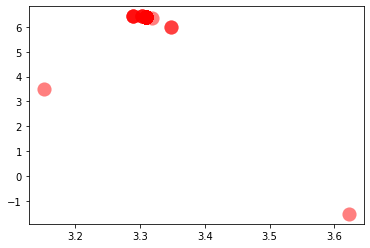

Time for Generation 108: 0.3044 seconds
Generation:  109
Max F_values:  633.5890553238448


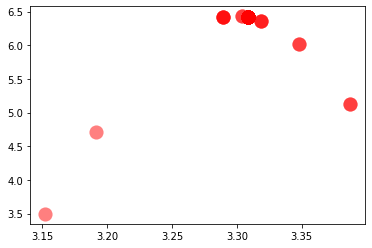

Time for Generation 109: 0.2865 seconds
Generation:  110
Max F_values:  629.5644004399238


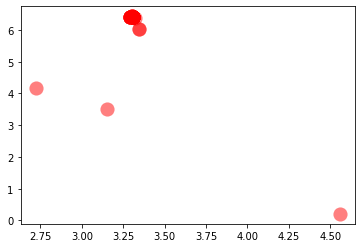

Time for Generation 110: 0.3396 seconds
Generation:  111
Max F_values:  640.7839350893582


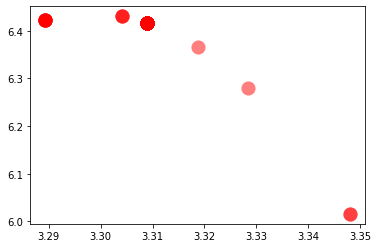

Time for Generation 111: 0.3390 seconds
Generation:  112
Max F_values:  640.7829684440103


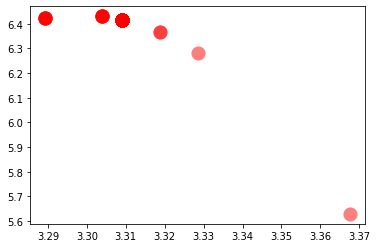

Time for Generation 112: 0.3872 seconds
Generation:  113
Max F_values:  621.7132801918455


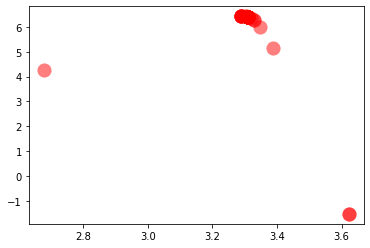

Time for Generation 113: 0.2853 seconds
Generation:  114
Max F_values:  628.111944735557


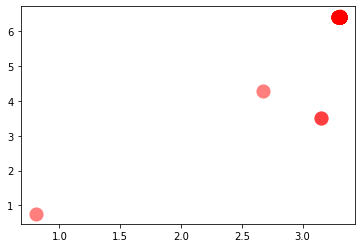

Time for Generation 114: 0.3039 seconds
Generation:  115
Max F_values:  628.2261631645664


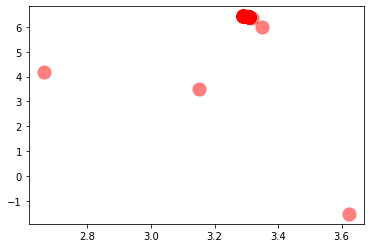

Time for Generation 115: 0.2966 seconds
Generation:  116
Max F_values:  638.8294050079794


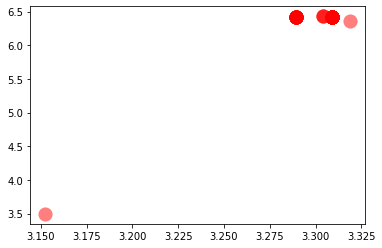

Time for Generation 116: 0.3045 seconds
Generation:  117
Max F_values:  637.9808876896811


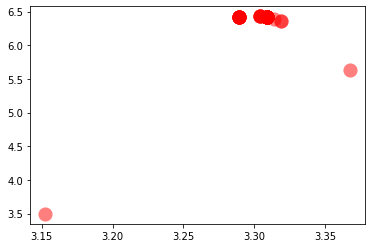

Time for Generation 117: 0.3101 seconds
Generation:  118
Max F_values:  635.5920615569544


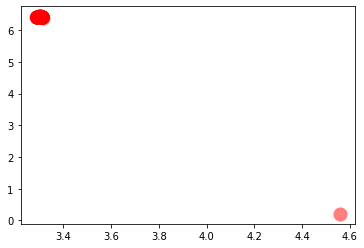

Time for Generation 118: 0.2782 seconds
Generation:  119
Max F_values:  629.3921793279613


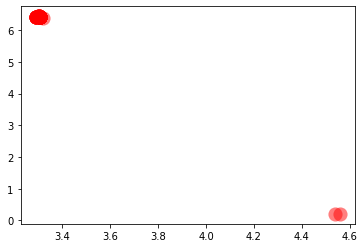

Time for Generation 119: 0.2764 seconds
Generation:  120
Max F_values:  641.4305400482084


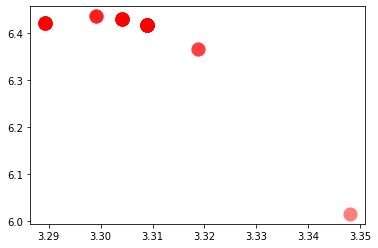

Time for Generation 120: 0.2803 seconds
Generation:  121
Max F_values:  640.8718877894886


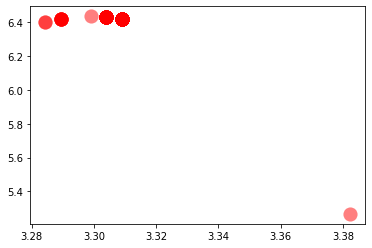

Time for Generation 121: 0.2677 seconds
Generation:  122
Max F_values:  610.2174567541085


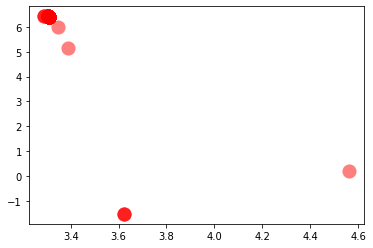

Time for Generation 122: 0.2426 seconds
Generation:  123
Max F_values:  630.2823576667126


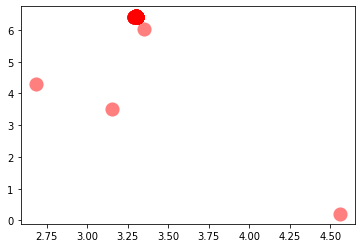

Time for Generation 123: 0.3272 seconds
Generation:  124
Max F_values:  633.3733418940747


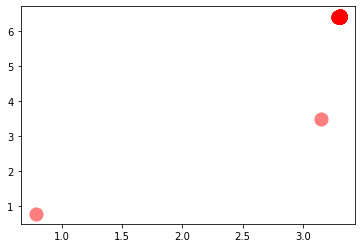

Time for Generation 124: 0.2759 seconds
Generation:  125
Max F_values:  623.2443745273134


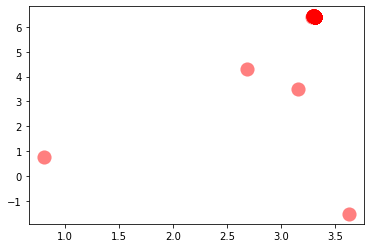

Time for Generation 125: 0.2893 seconds
Generation:  126
Max F_values:  624.0219500817965


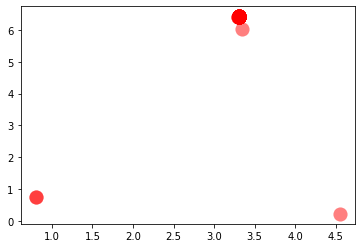

Time for Generation 126: 0.2906 seconds
Generation:  127
Max F_values:  629.0585910927514


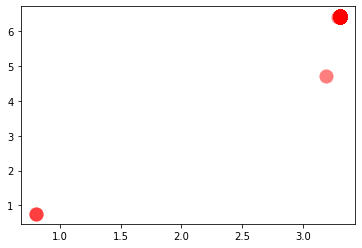

Time for Generation 127: 0.2490 seconds
Generation:  128
Max F_values:  633.0232198499494


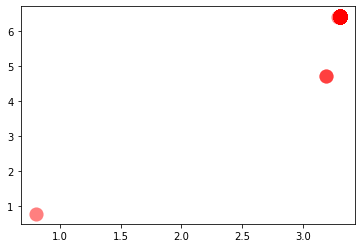

Time for Generation 128: 0.2739 seconds
Generation:  129
Max F_values:  629.1957906337908


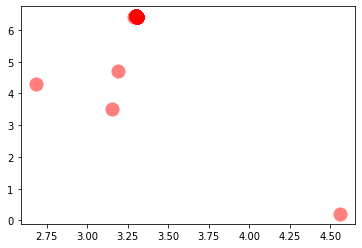

Time for Generation 129: 0.2968 seconds
Generation:  130
Max F_values:  630.2725190886712


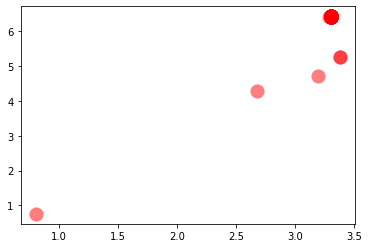

Time for Generation 130: 0.2693 seconds
Generation:  131
Max F_values:  617.5060729144803


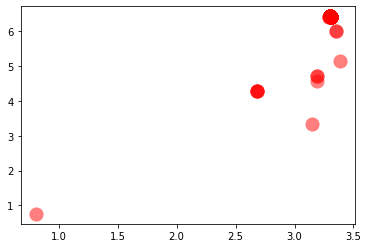

Time for Generation 131: 0.3437 seconds
Generation:  132
Max F_values:  619.0118407885308


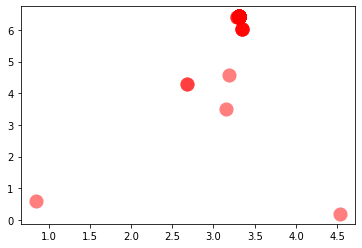

Time for Generation 132: 0.2852 seconds
Generation:  133
Max F_values:  634.8986919973255


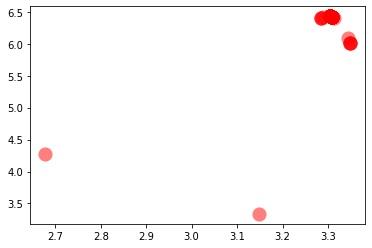

Time for Generation 133: 0.2914 seconds
Generation:  134
Max F_values:  633.4458531640774


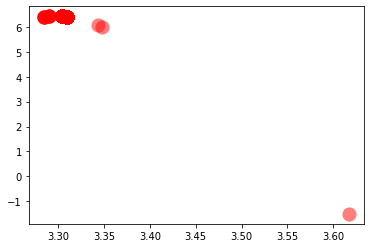

Time for Generation 134: 0.3347 seconds
Generation:  135
Max F_values:  639.9540820809059


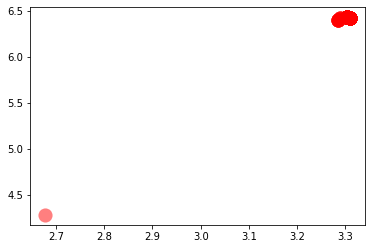

Time for Generation 135: 0.2589 seconds
Generation:  136
Max F_values:  642.0406234763207


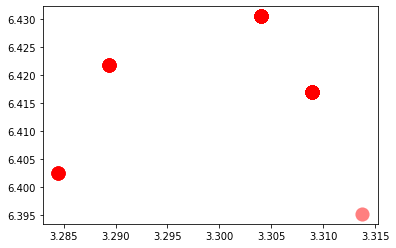

Time for Generation 136: 0.2787 seconds
Generation:  137
Max F_values:  636.1237889963887


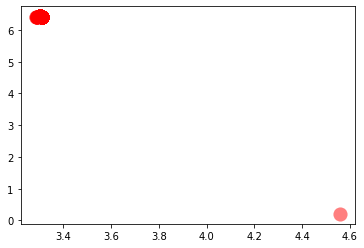

Time for Generation 137: 0.2773 seconds
Generation:  138
Max F_values:  628.1660302178186


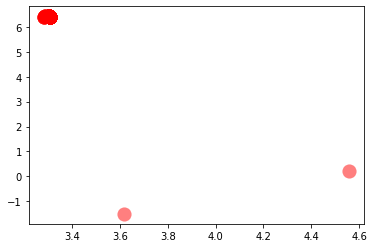

Time for Generation 138: 0.2744 seconds
Generation:  139
Max F_values:  634.5622181951537


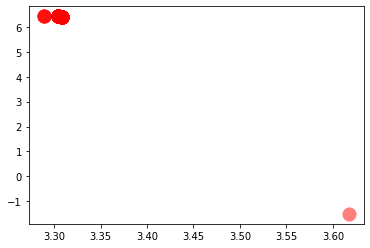

Time for Generation 139: 0.2669 seconds
Generation:  140
Max F_values:  635.1449261709308


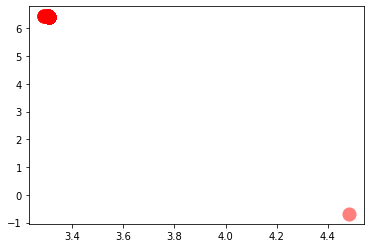

Time for Generation 140: 0.2876 seconds
Generation:  141
Max F_values:  641.0974087453385


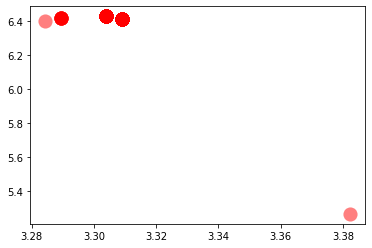

Time for Generation 141: 0.2783 seconds
Generation:  142
Max F_values:  635.3035062866807


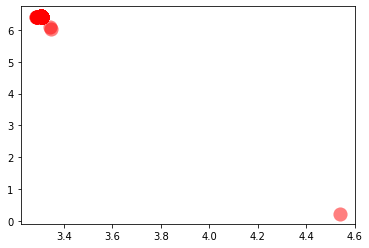

Time for Generation 142: 0.2927 seconds
Generation:  143
Max F_values:  640.8917972414235


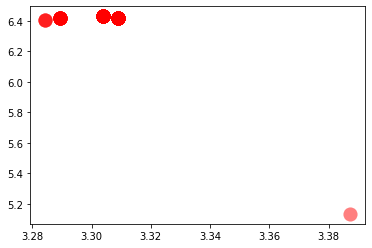

Time for Generation 143: 0.2870 seconds
Generation:  144
Max F_values:  625.1292681698205


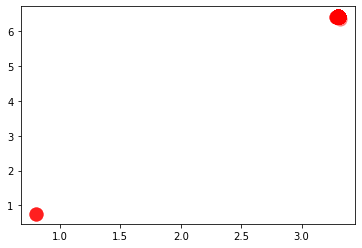

Time for Generation 144: 0.2797 seconds
Generation:  145
Max F_values:  637.8882967030519


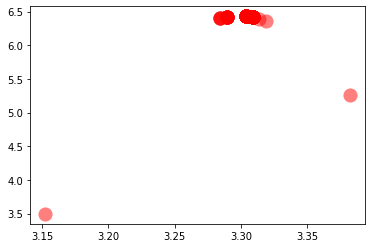

Time for Generation 145: 0.2899 seconds
Generation:  146
Max F_values:  632.5445628976365


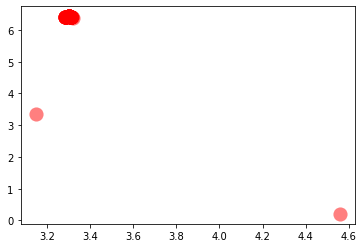

Time for Generation 146: 0.2841 seconds
Generation:  147
Max F_values:  634.3822890949089


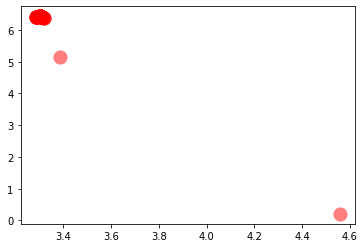

Time for Generation 147: 0.2741 seconds
Generation:  148
Max F_values:  639.3542586693998


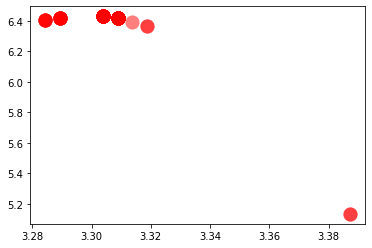

Time for Generation 148: 0.3020 seconds
Generation:  149
Max F_values:  633.3971574020337


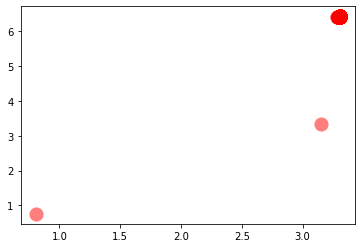

Time for Generation 149: 0.2480 seconds
Generation:  150
Max F_values:  641.8219386367382


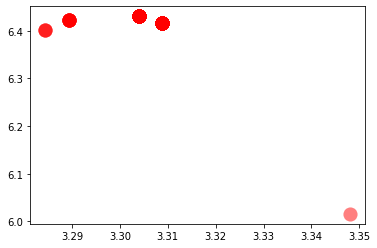

Time for Generation 150: 0.3156 seconds
Generation:  151
Max F_values:  638.8203162899694


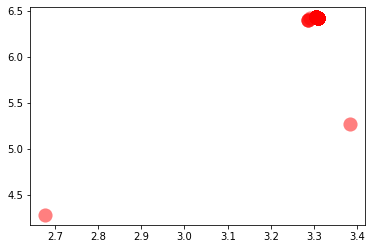

Time for Generation 151: 0.2666 seconds
Generation:  152
Max F_values:  625.1138735963837


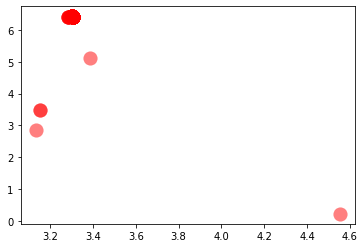

Time for Generation 152: 0.2851 seconds
Generation:  153
Max F_values:  630.0904804529332


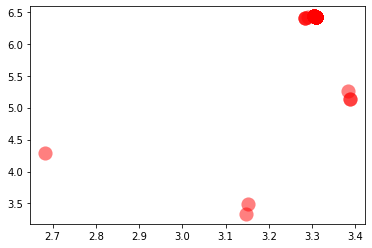

Time for Generation 153: 0.2992 seconds
Generation:  154
Max F_values:  640.9930331536796


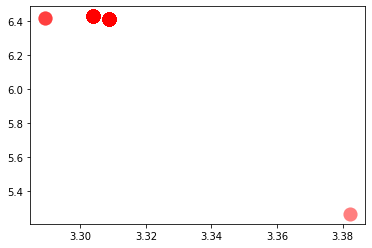

Time for Generation 154: 0.2482 seconds
Generation:  155
Max F_values:  642.1563513475419


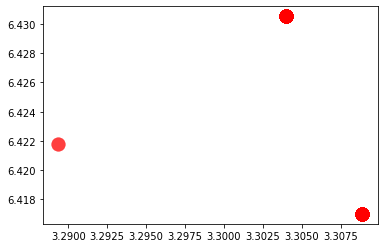

Time for Generation 155: 0.3110 seconds
Generation:  156
Max F_values:  639.7526861926444


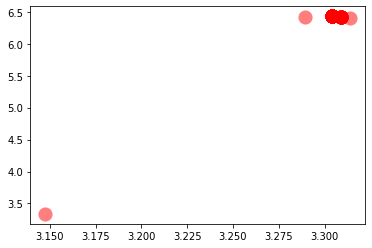

Time for Generation 156: 0.3331 seconds
Generation:  157
Max F_values:  642.7689703040762


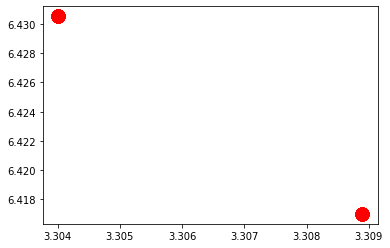

Time for Generation 157: 0.2973 seconds
Generation:  158
Max F_values:  635.1953101343989


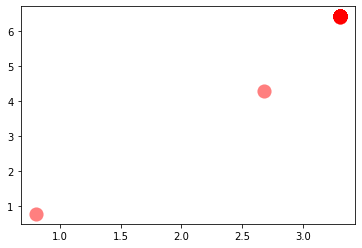

Time for Generation 158: 0.2635 seconds
Generation:  159
Max F_values:  642.8651539563219


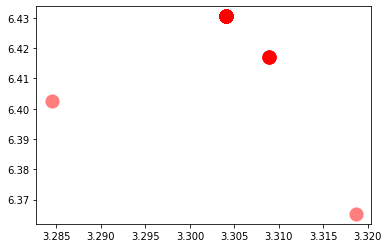

Time for Generation 159: 0.2893 seconds
Generation:  160
Max F_values:  630.6843467650192


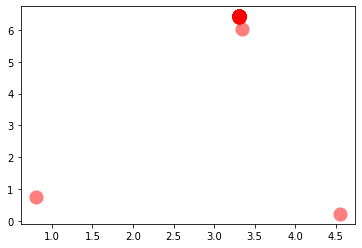

Time for Generation 160: 0.2792 seconds
Generation:  161
Max F_values:  623.7485998428862


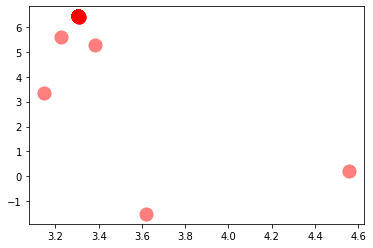

Time for Generation 161: 0.2989 seconds
Generation:  162
Max F_values:  636.7973647844867


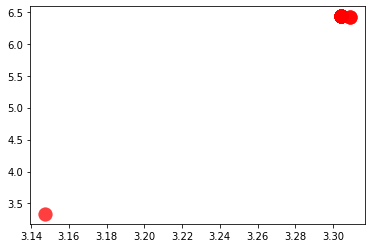

Time for Generation 162: 0.3330 seconds
Generation:  163
Max F_values:  639.655886902556


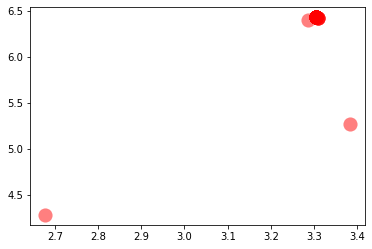

Time for Generation 163: 0.3289 seconds
Generation:  164
Max F_values:  639.5089759385219


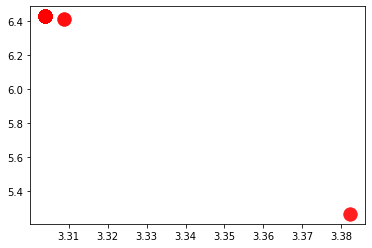

Time for Generation 164: 0.3388 seconds
Generation:  165
Max F_values:  630.7623468233418


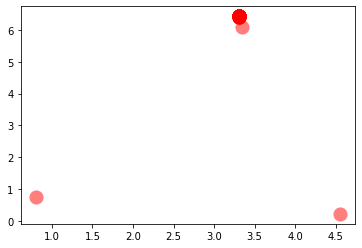

Time for Generation 165: 0.3119 seconds
Generation:  166
Max F_values:  637.7125113651398


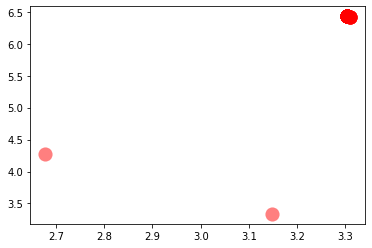

Time for Generation 166: 0.2906 seconds
Generation:  167
Max F_values:  637.2794933850721


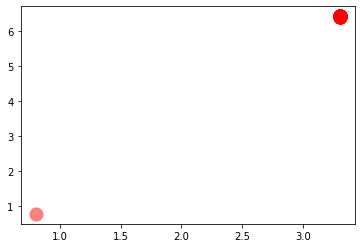

Time for Generation 167: 0.3160 seconds
Generation:  168
Max F_values:  626.2204540867638


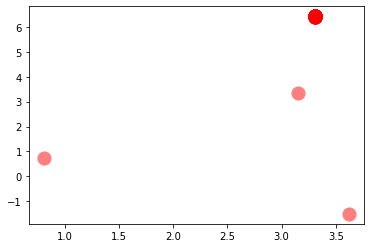

Time for Generation 168: 0.3308 seconds
Generation:  169
Max F_values:  636.9697056047


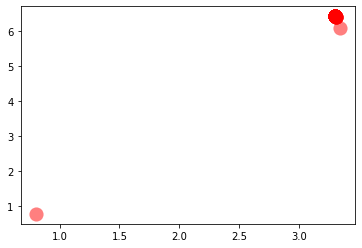

Time for Generation 169: 0.3016 seconds
Generation:  170
Max F_values:  621.0579262401797


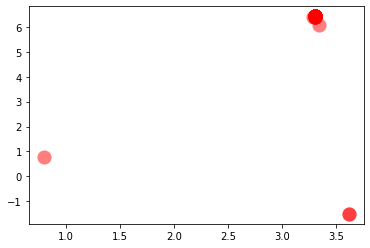

Time for Generation 170: 0.2983 seconds
Generation:  171
Max F_values:  629.2945006456364


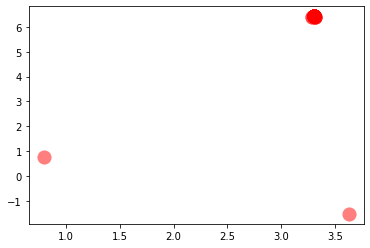

Time for Generation 171: 0.2808 seconds
Generation:  172
Max F_values:  631.5311116842763


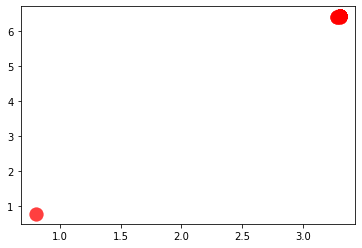

Time for Generation 172: 0.2788 seconds
Generation:  173
Max F_values:  622.3225826624148


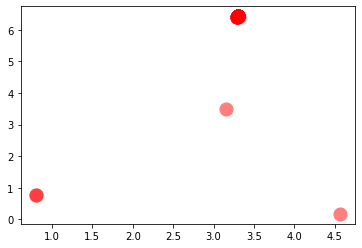

Time for Generation 173: 0.2830 seconds
Generation:  174
Max F_values:  636.650332317349


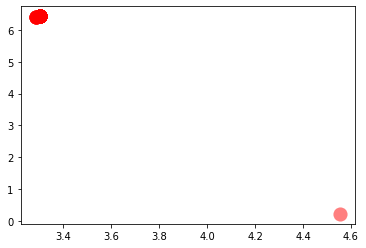

Time for Generation 174: 0.2924 seconds
Generation:  175
Max F_values:  623.5886573752449


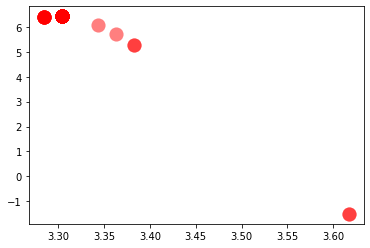

Time for Generation 175: 0.2704 seconds
Generation:  176
Max F_values:  626.1386210091362


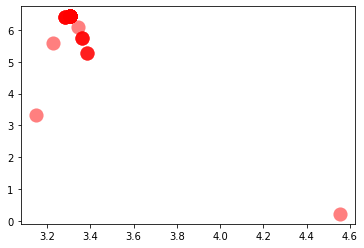

Time for Generation 176: 0.2878 seconds
Generation:  177
Max F_values:  629.2583915298923


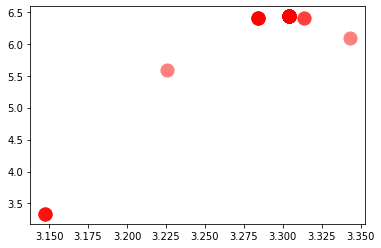

Time for Generation 177: 0.3252 seconds
Generation:  178
Max F_values:  640.0986173796217


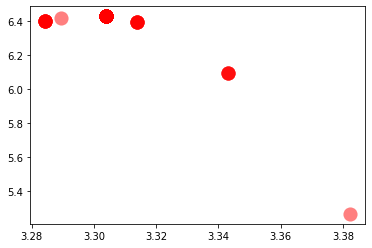

Time for Generation 178: 0.3329 seconds
Generation:  179
Max F_values:  636.3378797431681


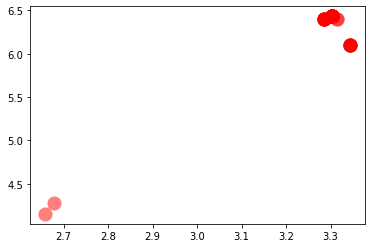

Time for Generation 179: 0.2970 seconds
Generation:  180
Max F_values:  630.3537158878713


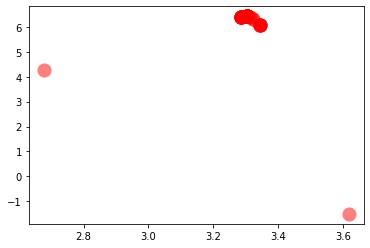

Time for Generation 180: 0.2839 seconds
Generation:  181
Max F_values:  629.8140169249066


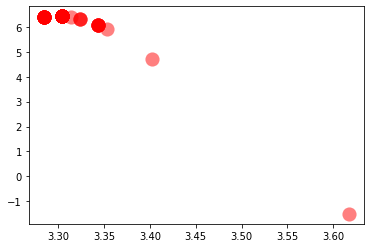

Time for Generation 181: 0.3127 seconds
Generation:  182
Max F_values:  635.2067784118536


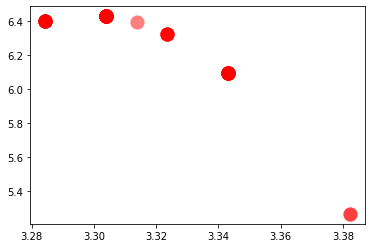

Time for Generation 182: 0.2440 seconds
Generation:  183
Max F_values:  628.6084557905479


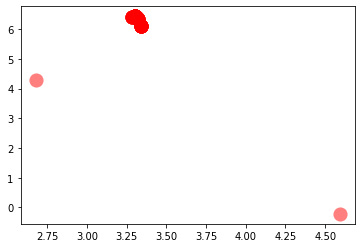

Time for Generation 183: 0.2838 seconds
Generation:  184
Max F_values:  613.4184206847516


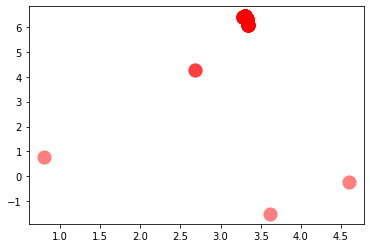

Time for Generation 184: 0.3254 seconds
Generation:  185
Max F_values:  630.9583198331914


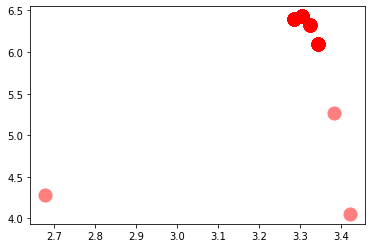

Time for Generation 185: 0.2804 seconds
Generation:  186
Max F_values:  639.0853816698346


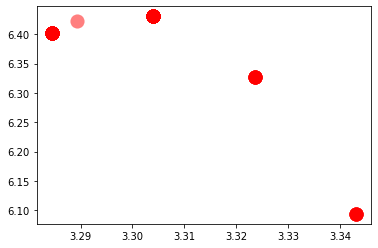

Time for Generation 186: 0.2910 seconds
Generation:  187
Max F_values:  638.1996105688263


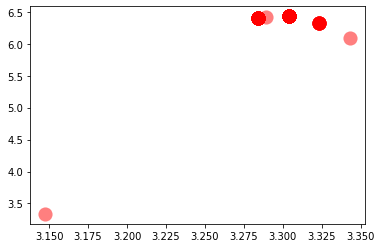

Time for Generation 187: 0.3391 seconds
Generation:  188
Max F_values:  622.0094040627656


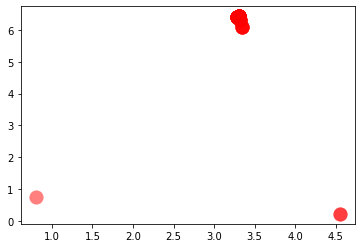

Time for Generation 188: 0.2839 seconds
Generation:  189
Max F_values:  639.5923271230096


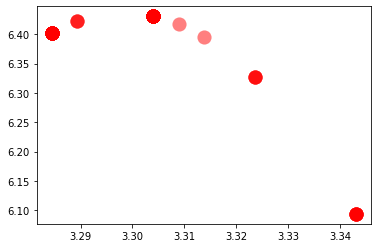

Time for Generation 189: 0.3545 seconds
Generation:  190
Max F_values:  637.1491434799295


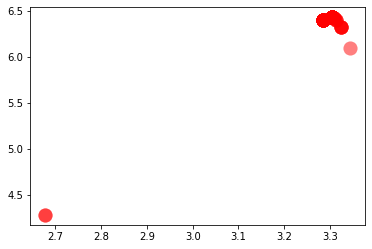

Time for Generation 190: 0.2921 seconds
Generation:  191
Max F_values:  626.9502511129675


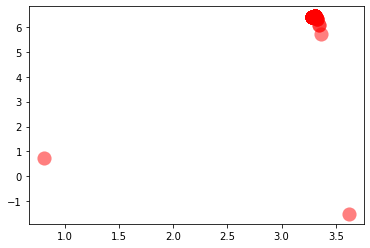

Time for Generation 191: 0.3851 seconds
Generation:  192
Max F_values:  627.1894386835153


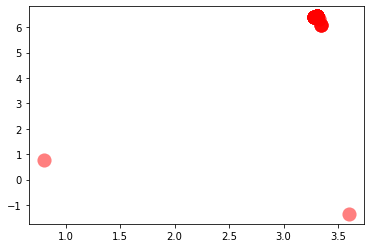

Time for Generation 192: 0.2939 seconds
Generation:  193
Max F_values:  638.7668137668945


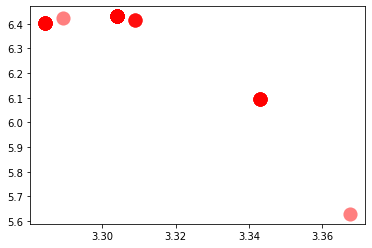

Time for Generation 193: 0.2977 seconds
Generation:  194
Max F_values:  635.52533725781


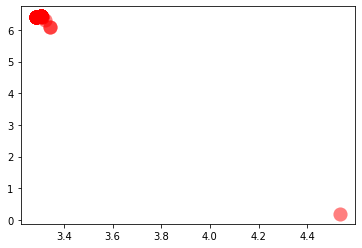

Time for Generation 194: 0.2709 seconds
Generation:  195
Max F_values:  638.1171015462915


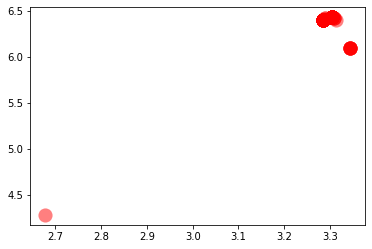

Time for Generation 195: 0.2740 seconds
Generation:  196
Max F_values:  627.38627364429


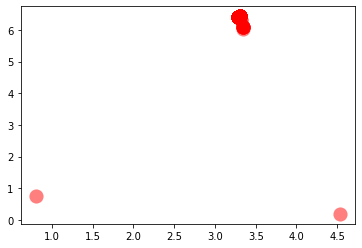

Time for Generation 196: 0.2758 seconds
Generation:  197
Max F_values:  621.1736906635351


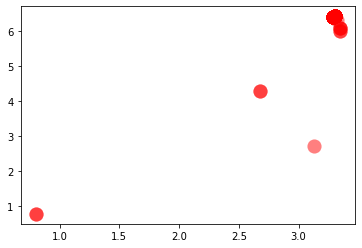

Time for Generation 197: 0.2551 seconds
Generation:  198
Max F_values:  627.9928415723875


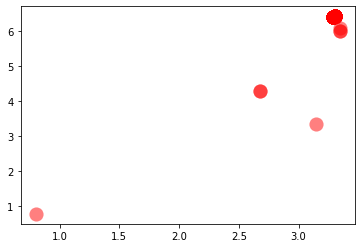

Time for Generation 198: 0.2795 seconds
Generation:  199
Max F_values:  634.8070793466699


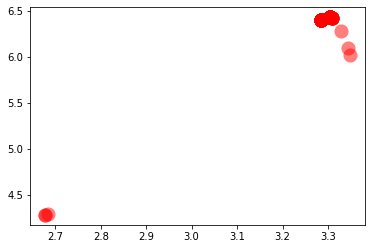

Time for Generation 199: 0.2844 seconds


([-64.68326722428246,
  21.945642550394012,
  54.075841372926824,
  128.69857480071482,
  210.27380724955057,
  271.7926906134896,
  354.0091494690941,
  443.37997798177196,
  506.38073019887497,
  527.0514475927224,
  528.856951631378,
  550.2673922869453,
  553.6314297141403,
  562.6434683488555,
  579.1390365107422,
  590.6075047241978,
  594.7308333485012,
  598.3639238553772,
  606.4336539111848,
  627.7010571179894,
  618.2833588539344,
  619.5695001629784,
  619.5807036134211,
  622.2458362094502,
  626.232654853958,
  631.0751063559978,
  632.2447319008537,
  628.419635549296,
  635.8272661824473,
  641.1026680600846,
  634.0397136660692,
  629.6175039144642,
  629.1978455307908,
  633.6742868149662,
  632.3787443688747,
  640.5740710331497,
  630.8520483349658,
  624.0624230955774,
  636.1538033701223,
  637.6057113021662,
  641.7382315391826,
  637.9661796781397,
  630.7394550670408,
  622.2741340150213,
  626.4504217603361,
  635.7947265013393,
  641.8482500521865,
  629.411

In [11]:
performance = []
time_per_iteration = []
pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE))
GA(N_GENERATIONS,pop)

## HW3.8 Performance Visualization
Generates a line plot using matplotlib or other tool to visualize the performance of the genetic algorithm over multiple generations.

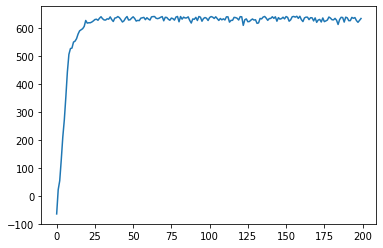

In [12]:
# TODO: Generates a line plot to visualize the genetic algorithm's performance across generations.

## HW3.9 Discuss1
Increase the mutation rate, follow the above steps, observe the performance, and provide a discussion.

Generation:  0
Max F_values:  -56.67788564405704


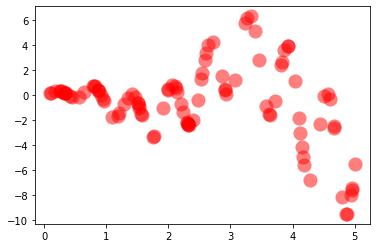

Time for Generation 0: 0.2873 seconds
Generation:  1
Max F_values:  -39.82581478163986


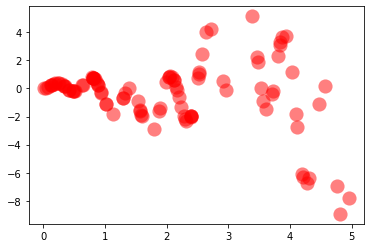

Time for Generation 1: 0.2991 seconds
Generation:  2
Max F_values:  -27.0411155356883


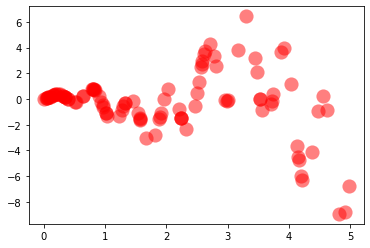

Time for Generation 2: 0.3284 seconds
Generation:  3
Max F_values:  -4.610812121737564


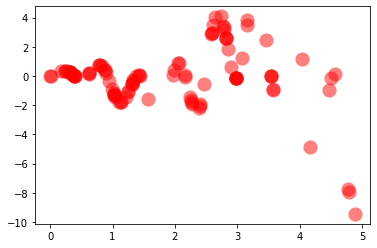

Time for Generation 3: 0.2824 seconds
Generation:  4
Max F_values:  24.342915554877052


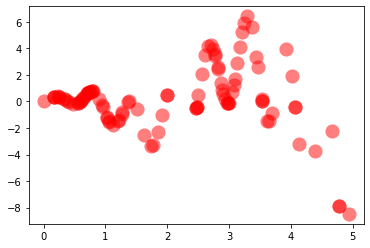

Time for Generation 4: 0.3134 seconds
Generation:  5
Max F_values:  55.447082690658355


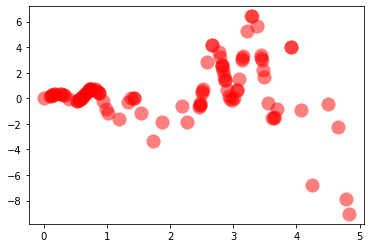

Time for Generation 5: 0.2875 seconds
Generation:  6
Max F_values:  59.84487352655042


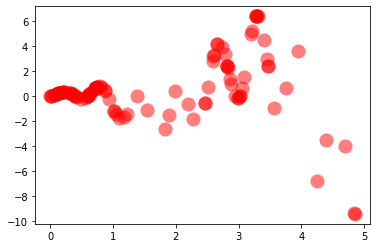

Time for Generation 6: 0.3179 seconds
Generation:  7
Max F_values:  94.87726189835728


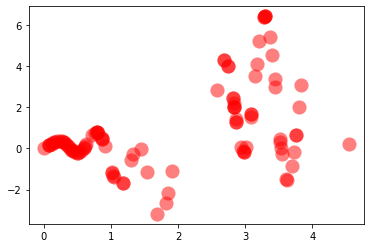

Time for Generation 7: 0.2847 seconds
Generation:  8
Max F_values:  136.0629807829931


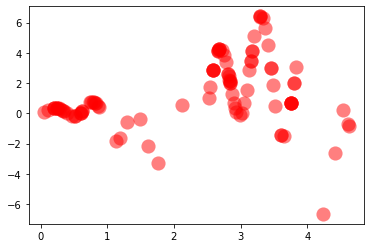

Time for Generation 8: 0.3177 seconds
Generation:  9
Max F_values:  172.98014061156988


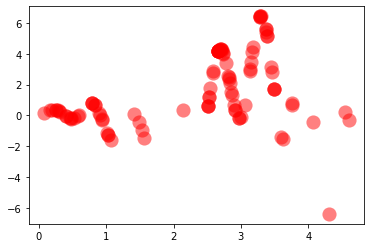

Time for Generation 9: 0.2706 seconds
Generation:  10
Max F_values:  225.97531600462358


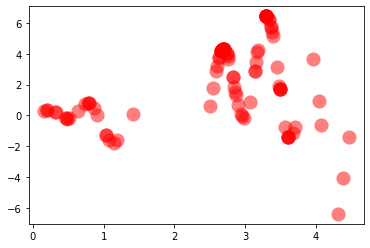

Time for Generation 10: 0.3319 seconds
Generation:  11
Max F_values:  226.55164982948213


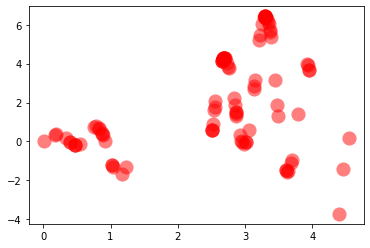

Time for Generation 11: 0.2948 seconds
Generation:  12
Max F_values:  324.9405904791113


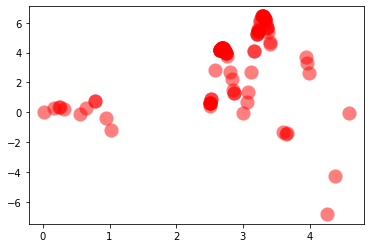

Time for Generation 12: 0.3143 seconds
Generation:  13
Max F_values:  307.796546073798


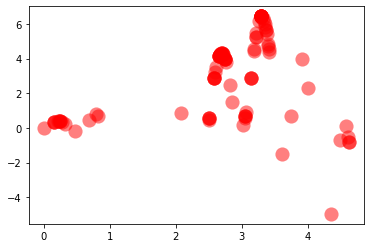

Time for Generation 13: 0.2761 seconds
Generation:  14
Max F_values:  331.1650702432015


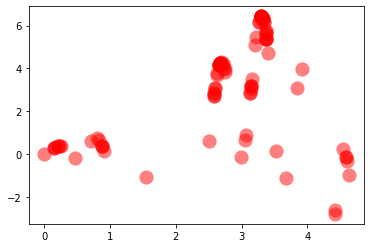

Time for Generation 14: 0.2796 seconds
Generation:  15
Max F_values:  404.36959384079563


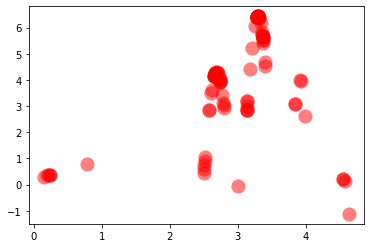

Time for Generation 15: 0.2733 seconds
Generation:  16
Max F_values:  459.2416070336102


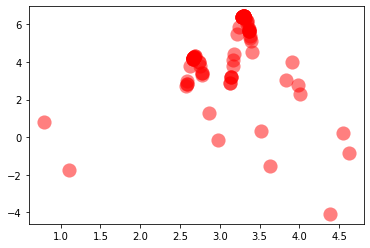

Time for Generation 16: 0.2848 seconds
Generation:  17
Max F_values:  442.3919674499424


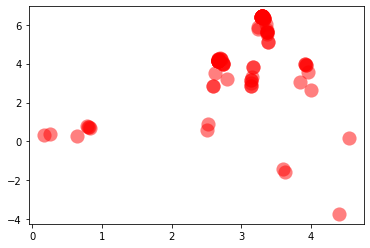

Time for Generation 17: 0.2393 seconds
Generation:  18
Max F_values:  407.9679362926002


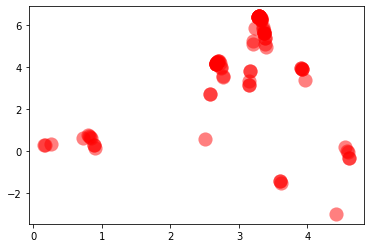

Time for Generation 18: 0.2646 seconds
Generation:  19
Max F_values:  431.6172028528256


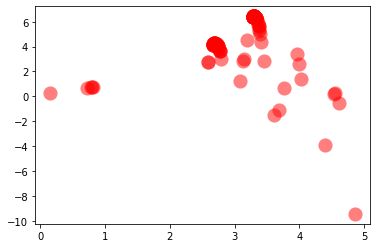

Time for Generation 19: 0.3069 seconds
Generation:  20
Max F_values:  429.4361510795274


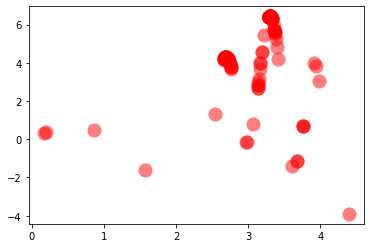

Time for Generation 20: 0.2438 seconds
Generation:  21
Max F_values:  462.704786246332


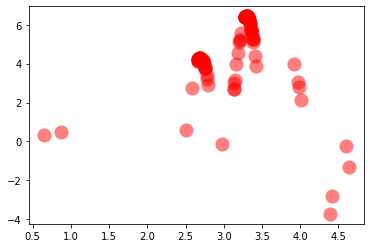

Time for Generation 21: 0.3377 seconds
Generation:  22
Max F_values:  434.8847399988254


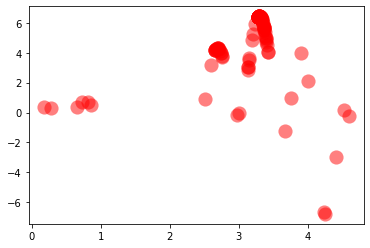

Time for Generation 22: 0.2852 seconds
Generation:  23
Max F_values:  437.08982271066355


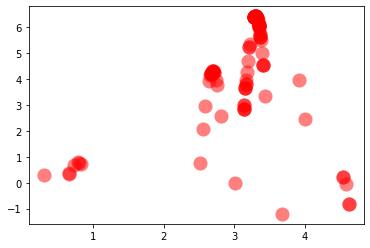

Time for Generation 23: 0.2672 seconds
Generation:  24
Max F_values:  442.1545905515211


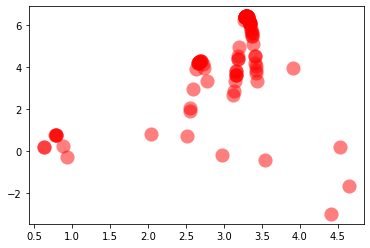

Time for Generation 24: 0.2523 seconds
Generation:  25
Max F_values:  488.9917598256509


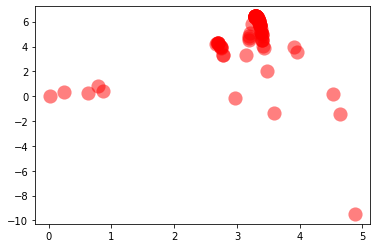

Time for Generation 25: 0.2988 seconds
Generation:  26
Max F_values:  439.11355804284153


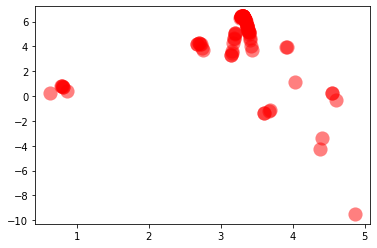

Time for Generation 26: 0.2748 seconds
Generation:  27
Max F_values:  480.4127798096115


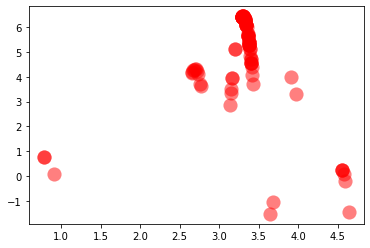

Time for Generation 27: 0.3422 seconds
Generation:  28
Max F_values:  482.0702166292436


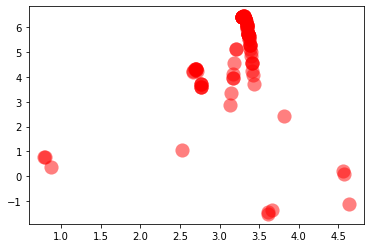

Time for Generation 28: 0.3089 seconds
Generation:  29
Max F_values:  463.91202627790716


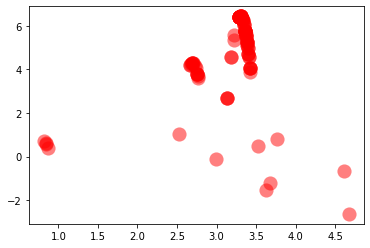

Time for Generation 29: 0.3112 seconds
Generation:  30
Max F_values:  460.3180746142786


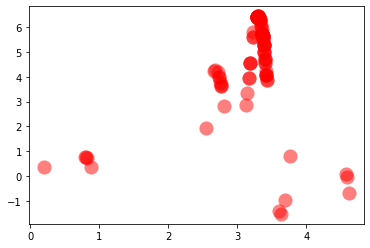

Time for Generation 30: 0.2697 seconds
Generation:  31
Max F_values:  493.7563804085808


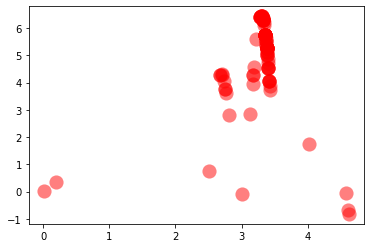

Time for Generation 31: 0.3102 seconds
Generation:  32
Max F_values:  512.589343995616


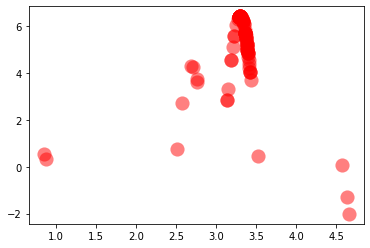

Time for Generation 32: 0.3502 seconds
Generation:  33
Max F_values:  485.10710814961493


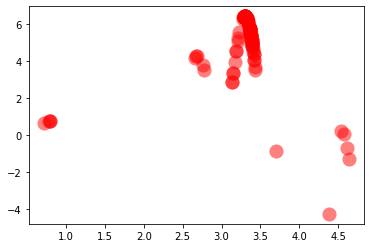

Time for Generation 33: 0.2928 seconds
Generation:  34
Max F_values:  505.50169116421074


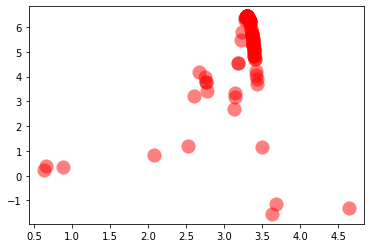

Time for Generation 34: 0.2464 seconds
Generation:  35
Max F_values:  489.1615614207221


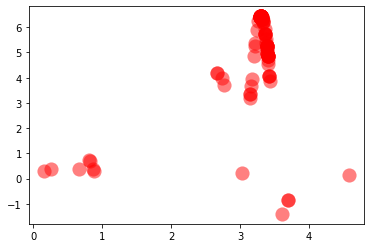

Time for Generation 35: 0.2853 seconds
Generation:  36
Max F_values:  507.38091585766466


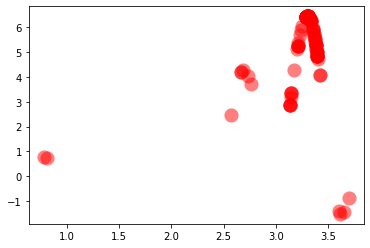

Time for Generation 36: 0.2570 seconds
Generation:  37
Max F_values:  471.6629391846641


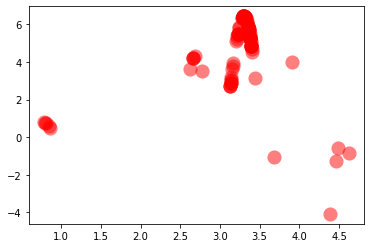

Time for Generation 37: 0.3109 seconds
Generation:  38
Max F_values:  443.6951933254597


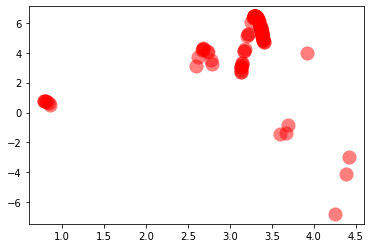

Time for Generation 38: 0.3044 seconds
Generation:  39
Max F_values:  413.16329597688116


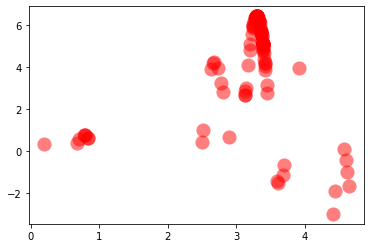

Time for Generation 39: 0.2631 seconds
Generation:  40
Max F_values:  377.8750607113079


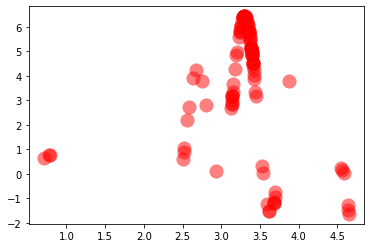

Time for Generation 40: 0.3135 seconds
Generation:  41
Max F_values:  458.16507301862714


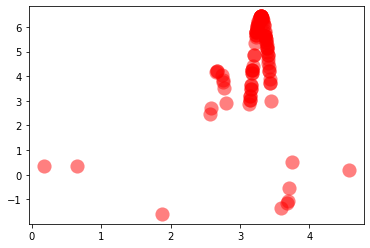

Time for Generation 41: 0.2889 seconds
Generation:  42
Max F_values:  472.2730959206955


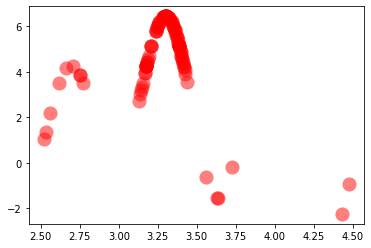

Time for Generation 42: 0.3175 seconds
Generation:  43
Max F_values:  460.6246035664797


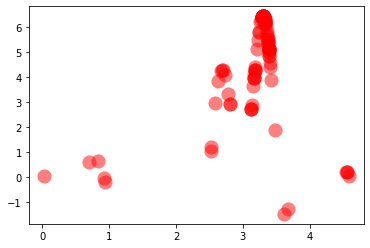

Time for Generation 43: 0.3295 seconds
Generation:  44
Max F_values:  449.98664075675333


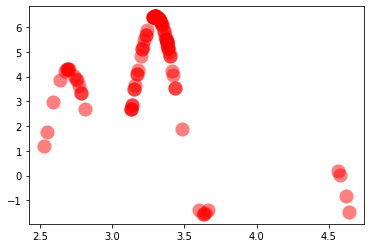

Time for Generation 44: 0.3191 seconds
Generation:  45
Max F_values:  426.96777347130626


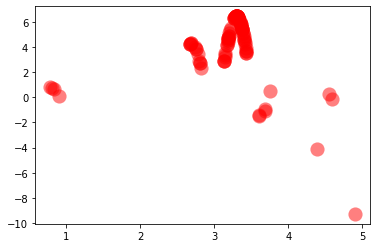

Time for Generation 45: 0.2949 seconds
Generation:  46
Max F_values:  387.9816742900904


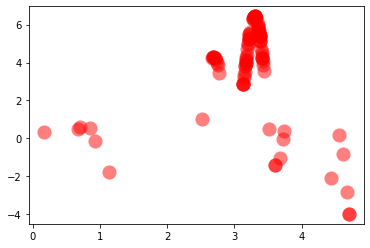

Time for Generation 46: 0.2972 seconds
Generation:  47
Max F_values:  430.76370246892515


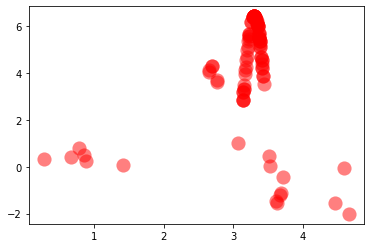

Time for Generation 47: 0.2754 seconds
Generation:  48
Max F_values:  497.7932452771917


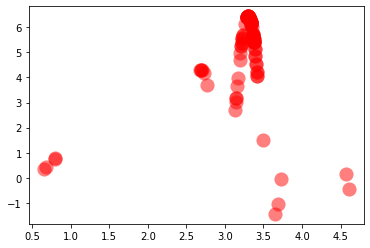

Time for Generation 48: 0.3012 seconds
Generation:  49
Max F_values:  494.44734805399304


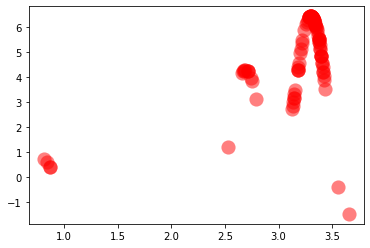

Time for Generation 49: 0.3212 seconds
Generation:  50
Max F_values:  504.45707414686575


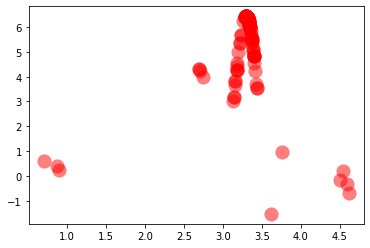

Time for Generation 50: 0.2890 seconds
Generation:  51
Max F_values:  499.7708583992101


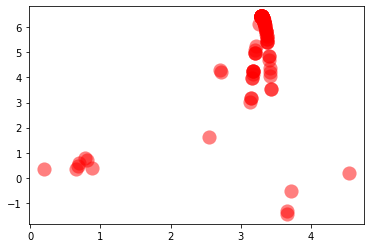

Time for Generation 51: 0.2488 seconds
Generation:  52
Max F_values:  498.83673349790325


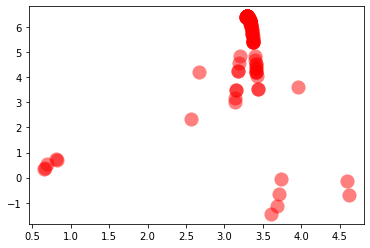

Time for Generation 52: 0.2814 seconds
Generation:  53
Max F_values:  472.66584367494573


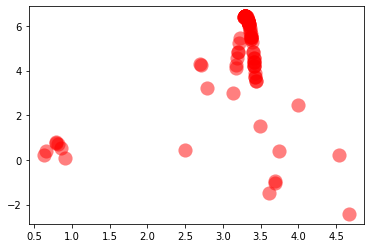

Time for Generation 53: 0.2880 seconds
Generation:  54
Max F_values:  469.47747946735024


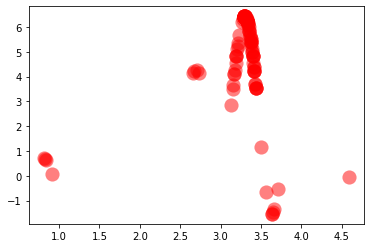

Time for Generation 54: 0.3706 seconds
Generation:  55
Max F_values:  457.05377244249627


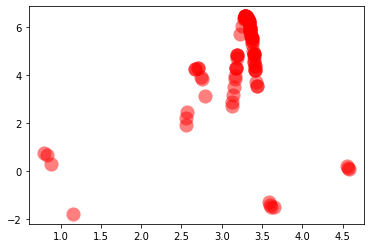

Time for Generation 55: 0.2632 seconds
Generation:  56
Max F_values:  475.54356408176153


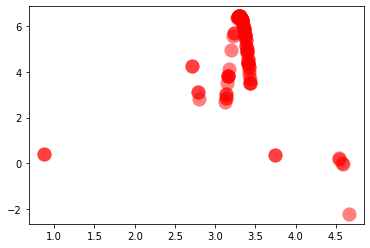

Time for Generation 56: 0.2967 seconds
Generation:  57
Max F_values:  481.3142441063386


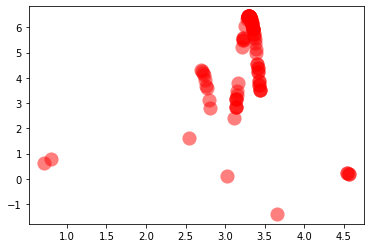

Time for Generation 57: 0.3167 seconds
Generation:  58
Max F_values:  492.88256684236376


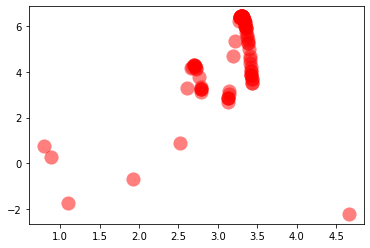

Time for Generation 58: 0.2990 seconds
Generation:  59
Max F_values:  480.7051219380097


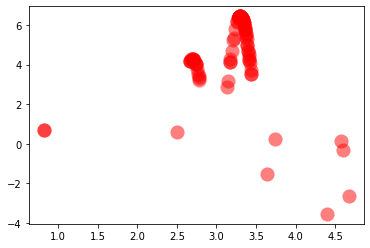

Time for Generation 59: 0.2998 seconds
Generation:  60
Max F_values:  474.8903077709646


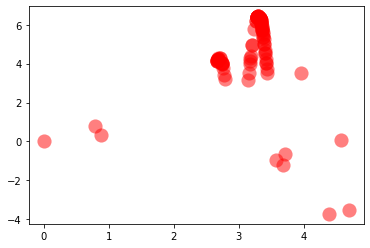

Time for Generation 60: 0.2710 seconds
Generation:  61
Max F_values:  463.44084070792695


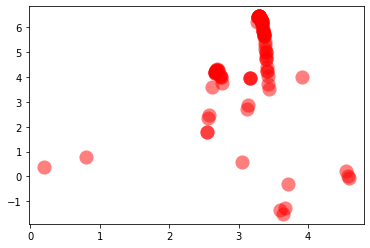

Time for Generation 61: 0.2999 seconds
Generation:  62
Max F_values:  465.90403321165047


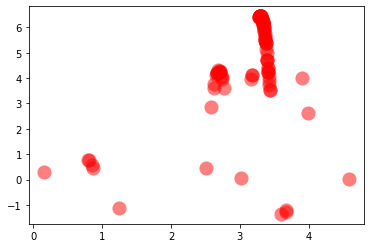

Time for Generation 62: 0.2799 seconds
Generation:  63
Max F_values:  480.2493080870279


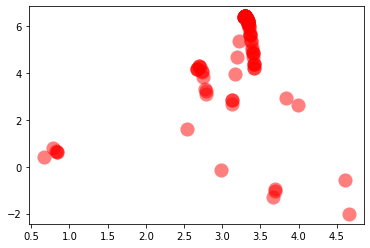

Time for Generation 63: 0.2545 seconds
Generation:  64
Max F_values:  499.78178363943715


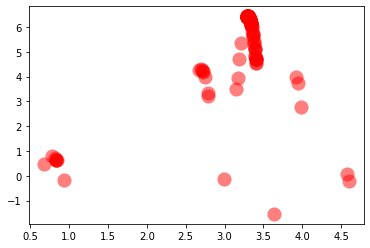

Time for Generation 64: 0.2862 seconds
Generation:  65
Max F_values:  531.574048614688


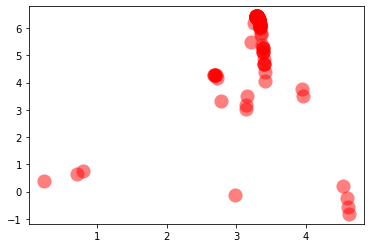

Time for Generation 65: 0.3253 seconds
Generation:  66
Max F_values:  504.75716382035404


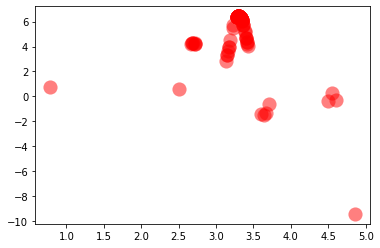

Time for Generation 66: 0.3169 seconds
Generation:  67
Max F_values:  466.0744900530516


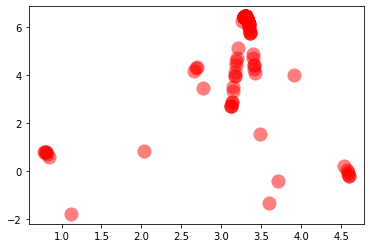

Time for Generation 67: 0.2820 seconds
Generation:  68
Max F_values:  477.89437605395364


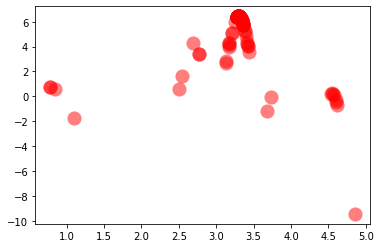

Time for Generation 68: 0.3014 seconds
Generation:  69
Max F_values:  435.5833743061855


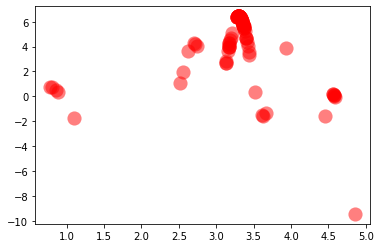

Time for Generation 69: 0.2871 seconds
Generation:  70
Max F_values:  404.1724507002839


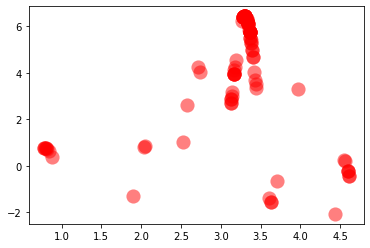

Time for Generation 70: 0.2683 seconds
Generation:  71
Max F_values:  421.00312066598474


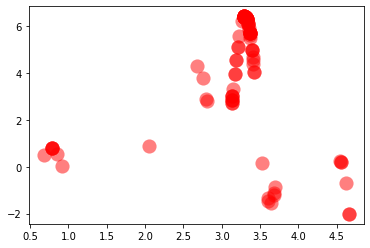

Time for Generation 71: 0.2921 seconds
Generation:  72
Max F_values:  441.6842612148121


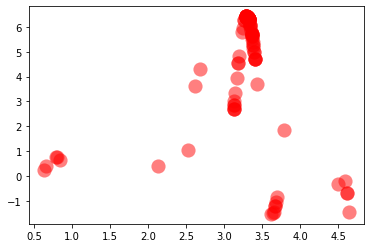

Time for Generation 72: 0.3519 seconds
Generation:  73
Max F_values:  523.629899639336


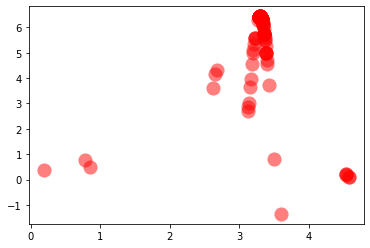

Time for Generation 73: 0.3228 seconds
Generation:  74
Max F_values:  525.7067280950821


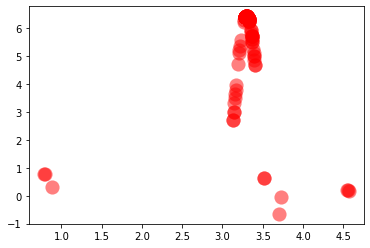

Time for Generation 74: 0.3233 seconds
Generation:  75
Max F_values:  498.0171827230109


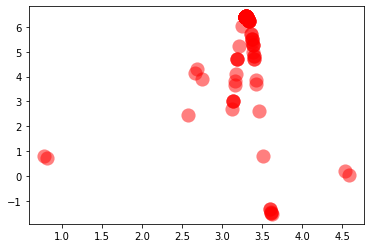

Time for Generation 75: 0.2896 seconds
Generation:  76
Max F_values:  536.2325555115319


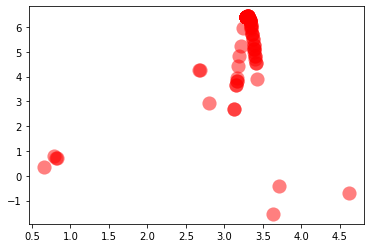

Time for Generation 76: 0.3689 seconds
Generation:  77
Max F_values:  562.027857973098


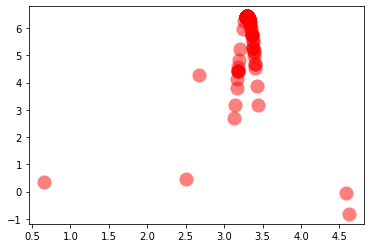

Time for Generation 77: 0.3020 seconds
Generation:  78
Max F_values:  544.0405864814692


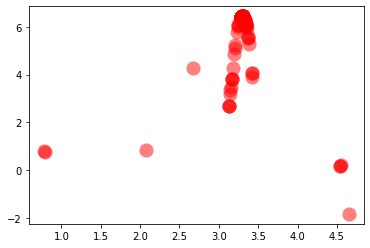

Time for Generation 78: 0.3031 seconds
Generation:  79
Max F_values:  491.7809386371677


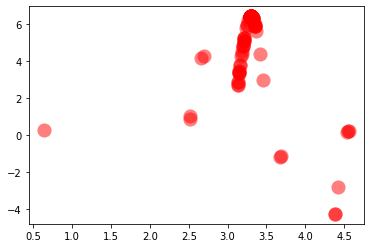

Time for Generation 79: 0.3195 seconds
Generation:  80
Max F_values:  476.36995088973185


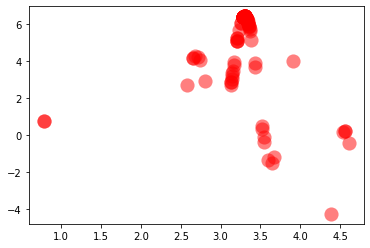

Time for Generation 80: 0.3083 seconds
Generation:  81
Max F_values:  507.6186335340868


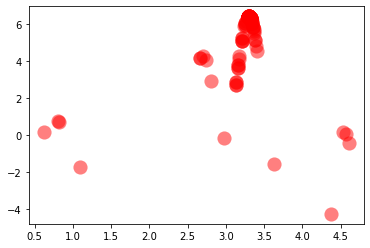

Time for Generation 81: 0.3059 seconds
Generation:  82
Max F_values:  492.1317482756435


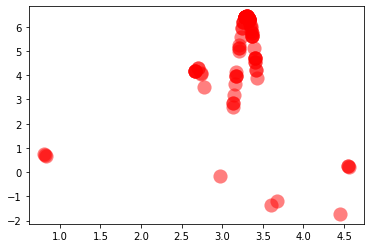

Time for Generation 82: 0.3547 seconds
Generation:  83
Max F_values:  464.8957482993278


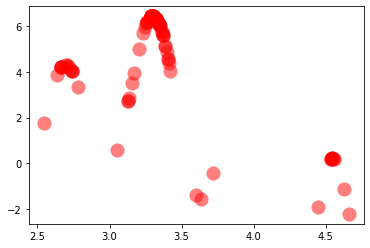

Time for Generation 83: 0.2341 seconds
Generation:  84
Max F_values:  483.57620013632845


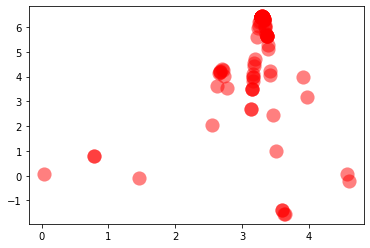

Time for Generation 84: 0.3939 seconds
Generation:  85
Max F_values:  457.4733539592952


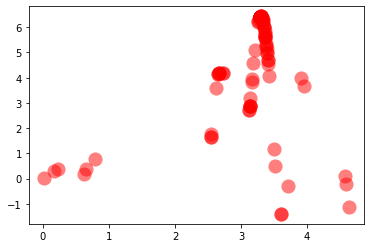

Time for Generation 85: 0.3371 seconds
Generation:  86
Max F_values:  483.73416434134106


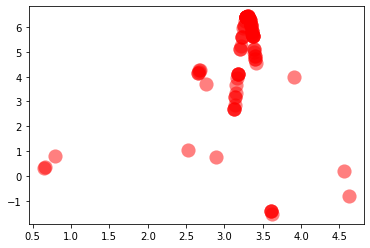

Time for Generation 86: 0.3169 seconds
Generation:  87
Max F_values:  485.98029911139054


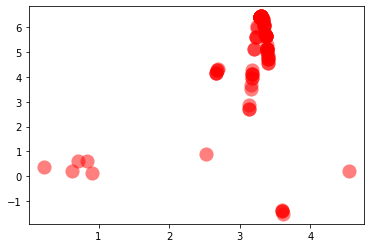

Time for Generation 87: 0.3459 seconds
Generation:  88
Max F_values:  470.0187605762451


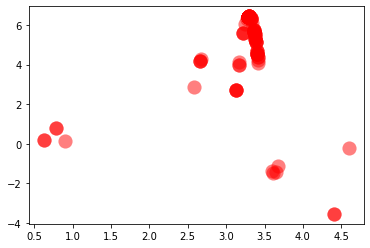

Time for Generation 88: 0.2982 seconds
Generation:  89
Max F_values:  497.325428354128


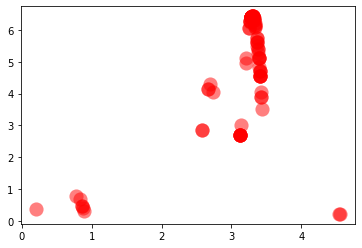

Time for Generation 89: 0.2844 seconds
Generation:  90
Max F_values:  507.5281371357376


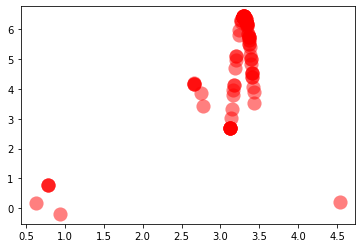

Time for Generation 90: 0.3269 seconds
Generation:  91
Max F_values:  463.18633035497743


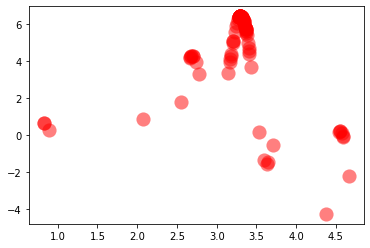

Time for Generation 91: 0.2831 seconds
Generation:  92
Max F_values:  440.3755114271837


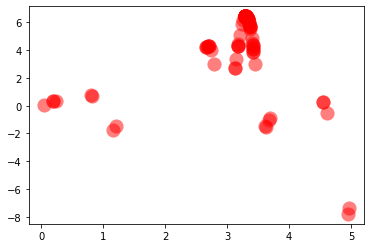

Time for Generation 92: 0.2590 seconds
Generation:  93
Max F_values:  426.5539508242125


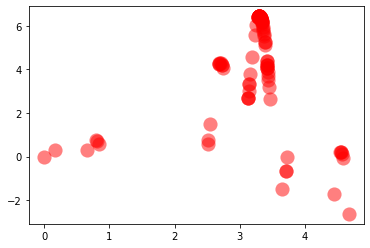

Time for Generation 93: 0.2464 seconds
Generation:  94
Max F_values:  441.8986835114035


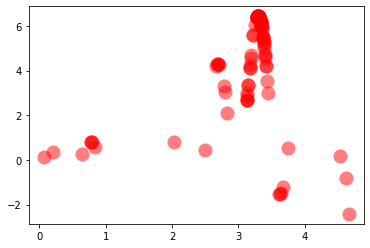

Time for Generation 94: 0.2180 seconds
Generation:  95
Max F_values:  422.2461294915288


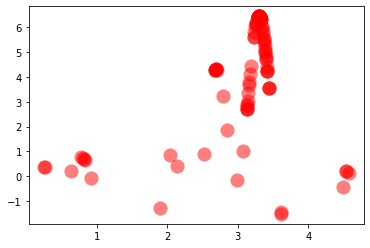

Time for Generation 95: 0.2623 seconds
Generation:  96
Max F_values:  487.6330095526801


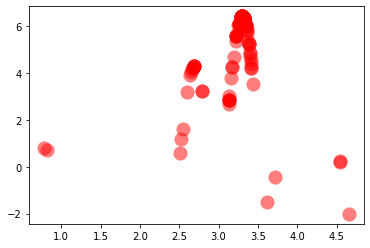

Time for Generation 96: 0.3164 seconds
Generation:  97
Max F_values:  451.5013297933606


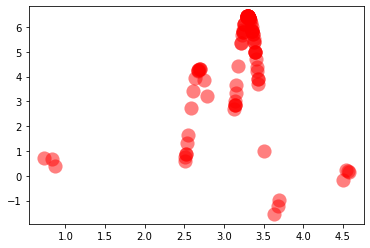

Time for Generation 97: 0.3354 seconds
Generation:  98
Max F_values:  474.93729213844966


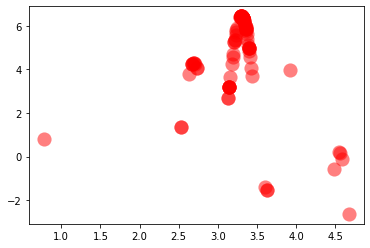

Time for Generation 98: 0.2930 seconds
Generation:  99
Max F_values:  497.6499682103976


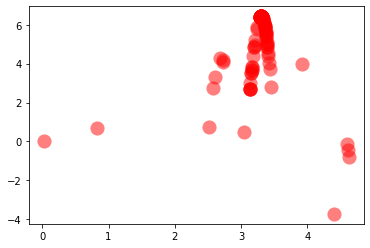

Time for Generation 99: 0.2681 seconds
Generation:  100
Max F_values:  495.4691282157825


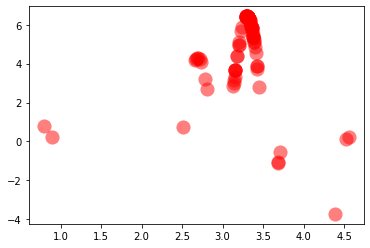

Time for Generation 100: 0.2966 seconds
Generation:  101
Max F_values:  490.9228060707131


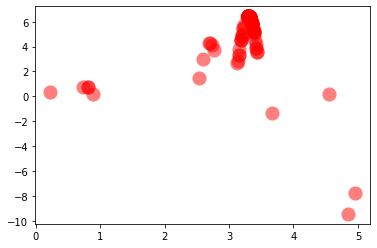

Time for Generation 101: 0.2549 seconds
Generation:  102
Max F_values:  489.6644420261908


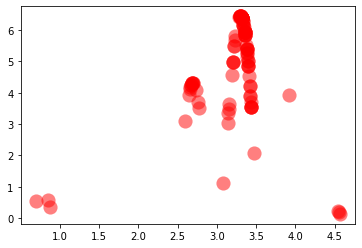

Time for Generation 102: 0.3435 seconds
Generation:  103
Max F_values:  441.16555870469347


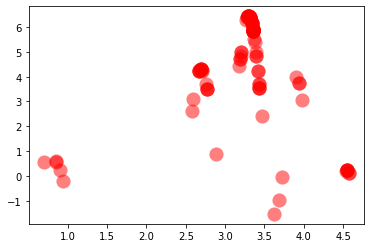

Time for Generation 103: 0.3491 seconds
Generation:  104
Max F_values:  441.5996773884875


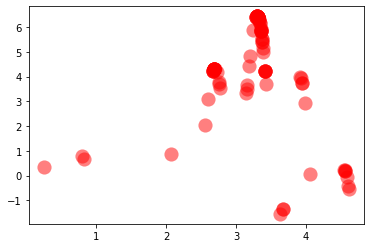

Time for Generation 104: 0.3074 seconds
Generation:  105
Max F_values:  429.5310842317452


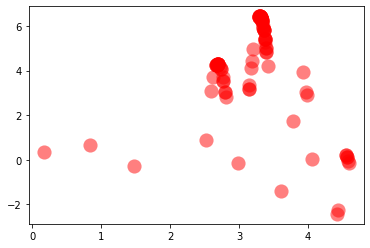

Time for Generation 105: 0.2806 seconds
Generation:  106
Max F_values:  455.4155856440333


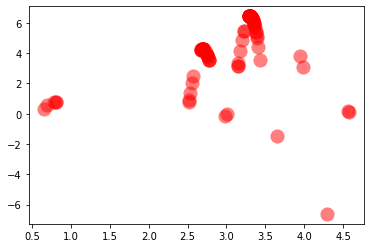

Time for Generation 106: 0.3111 seconds
Generation:  107
Max F_values:  473.5491550967663


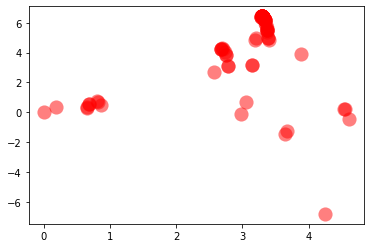

Time for Generation 107: 0.2866 seconds
Generation:  108
Max F_values:  452.24664118862046


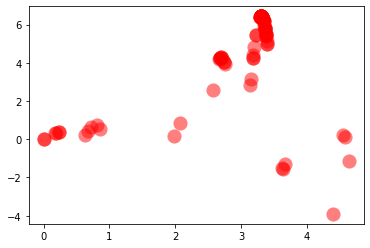

Time for Generation 108: 0.3021 seconds
Generation:  109
Max F_values:  464.37387210179804


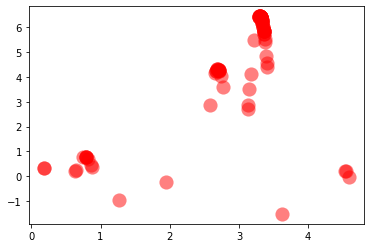

Time for Generation 109: 0.3185 seconds
Generation:  110
Max F_values:  440.4789998500049


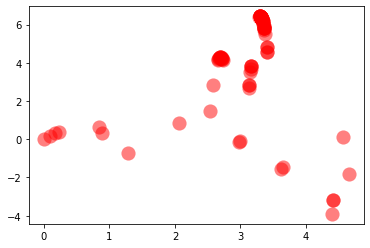

Time for Generation 110: 0.3145 seconds
Generation:  111
Max F_values:  442.6466966127996


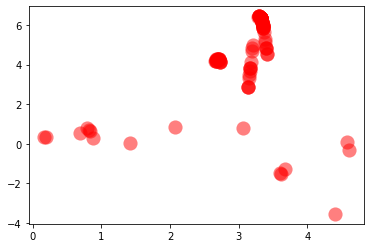

Time for Generation 111: 0.2896 seconds
Generation:  112
Max F_values:  474.0819392667266


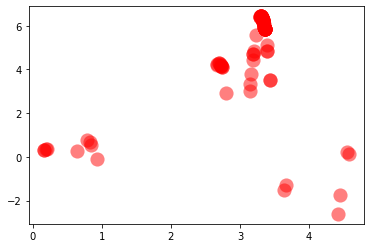

Time for Generation 112: 0.3050 seconds
Generation:  113
Max F_values:  447.93607896641737


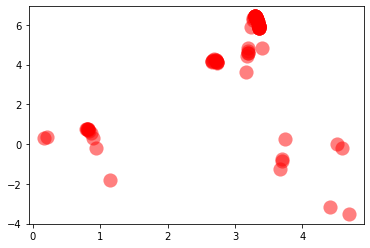

Time for Generation 113: 0.2816 seconds
Generation:  114
Max F_values:  457.5823731214331


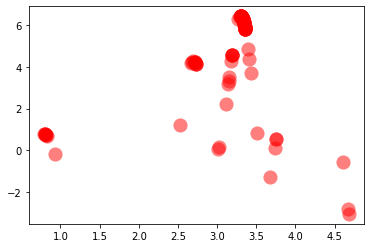

Time for Generation 114: 0.2896 seconds
Generation:  115
Max F_values:  505.4728672308663


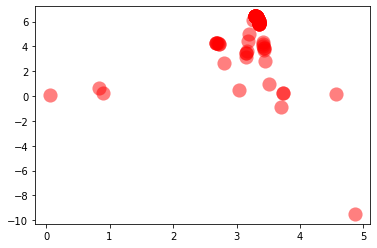

Time for Generation 115: 0.2925 seconds
Generation:  116
Max F_values:  530.7639750304261


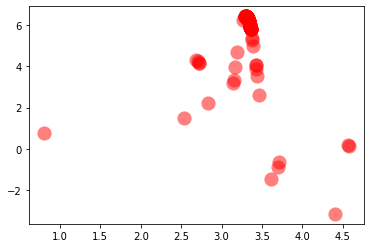

Time for Generation 116: 0.2948 seconds
Generation:  117
Max F_values:  494.15188533946014


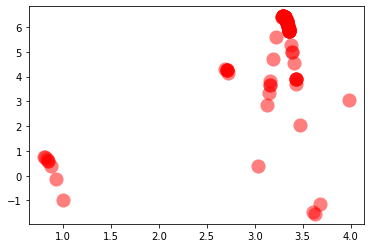

Time for Generation 117: 0.2969 seconds
Generation:  118
Max F_values:  519.9806780899333


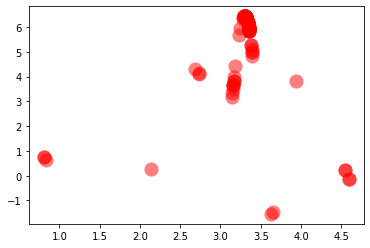

Time for Generation 118: 0.2974 seconds
Generation:  119
Max F_values:  526.3868961869335


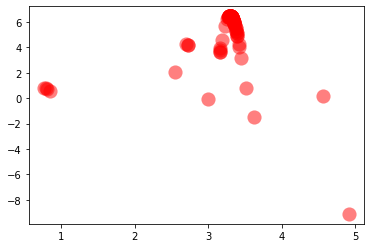

Time for Generation 119: 0.2898 seconds
Generation:  120
Max F_values:  499.84752471357876


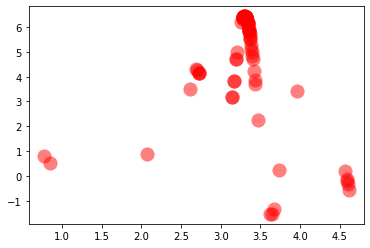

Time for Generation 120: 0.3707 seconds
Generation:  121
Max F_values:  530.9154233803986


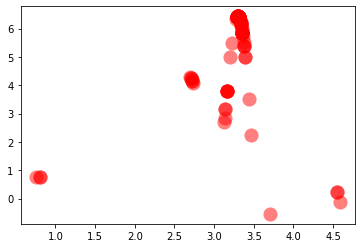

Time for Generation 121: 0.2909 seconds
Generation:  122
Max F_values:  523.8936096517637


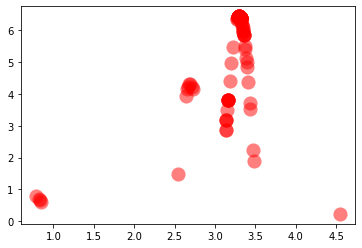

Time for Generation 122: 0.2943 seconds
Generation:  123
Max F_values:  475.7908164842057


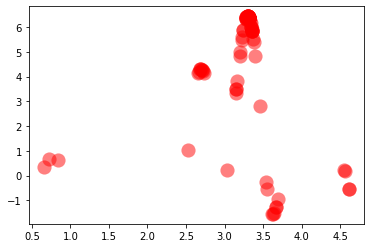

Time for Generation 123: 0.3215 seconds
Generation:  124
Max F_values:  517.1387566440367


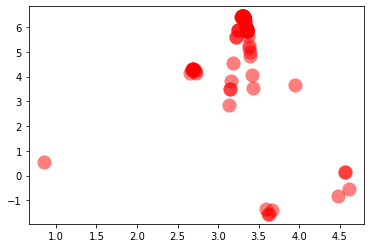

Time for Generation 124: 0.3005 seconds
Generation:  125
Max F_values:  530.7994119400925


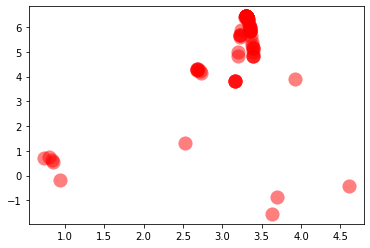

Time for Generation 125: 0.3312 seconds
Generation:  126
Max F_values:  501.21649016830327


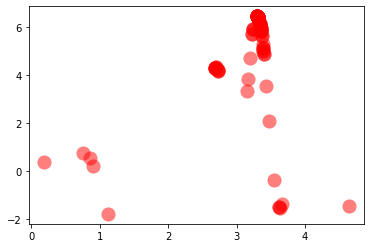

Time for Generation 126: 0.2558 seconds
Generation:  127
Max F_values:  492.85309632694555


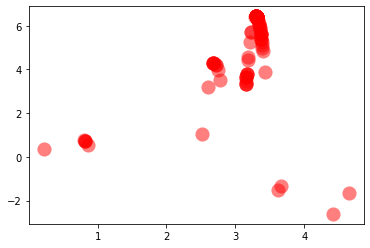

Time for Generation 127: 0.2220 seconds
Generation:  128
Max F_values:  489.23079911917347


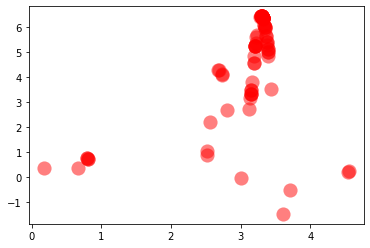

Time for Generation 128: 0.2963 seconds
Generation:  129
Max F_values:  511.7670414093368


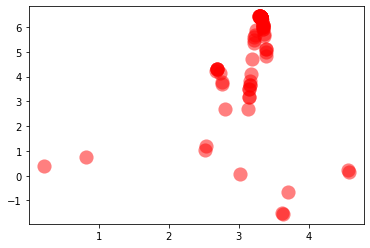

Time for Generation 129: 0.2938 seconds
Generation:  130
Max F_values:  515.6257928604243


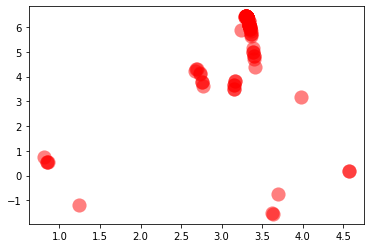

Time for Generation 130: 0.3130 seconds
Generation:  131
Max F_values:  536.5639289598564


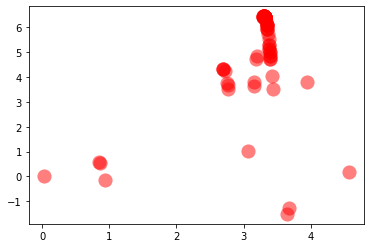

Time for Generation 131: 0.3259 seconds
Generation:  132
Max F_values:  521.947747159343


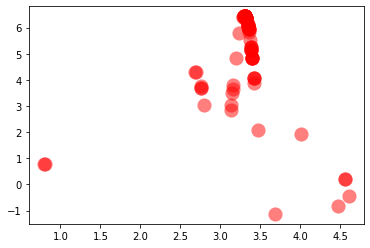

Time for Generation 132: 0.2976 seconds
Generation:  133
Max F_values:  500.9043807667557


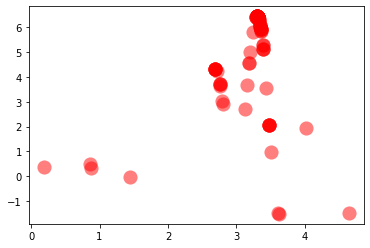

Time for Generation 133: 0.3160 seconds
Generation:  134
Max F_values:  513.0865506327982


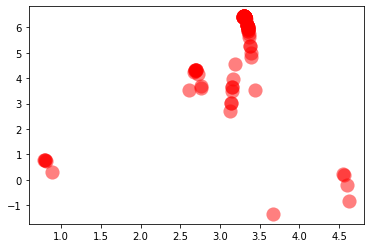

Time for Generation 134: 0.2990 seconds
Generation:  135
Max F_values:  529.0290748149048


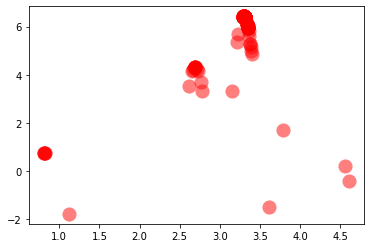

Time for Generation 135: 0.2822 seconds
Generation:  136
Max F_values:  524.8781362268329


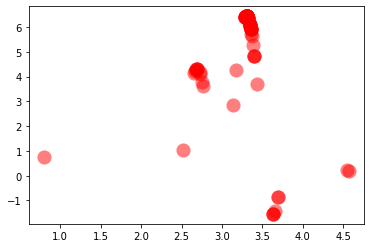

Time for Generation 136: 0.2846 seconds
Generation:  137
Max F_values:  546.1791878234874


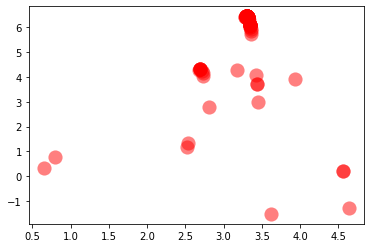

Time for Generation 137: 0.2958 seconds
Generation:  138
Max F_values:  513.6975208565552


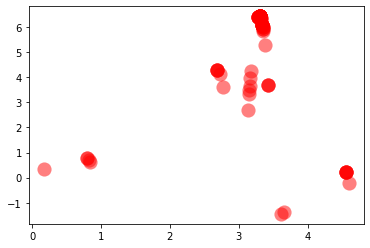

Time for Generation 138: 0.2765 seconds
Generation:  139
Max F_values:  530.4874521938807


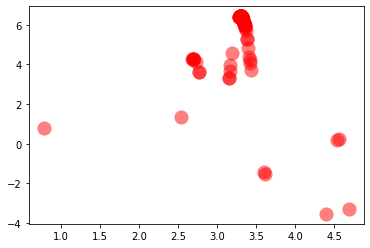

Time for Generation 139: 0.2902 seconds
Generation:  140
Max F_values:  486.3677224542825


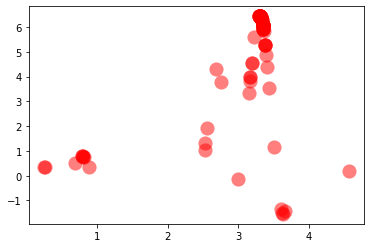

Time for Generation 140: 0.2893 seconds
Generation:  141
Max F_values:  485.68799478670206


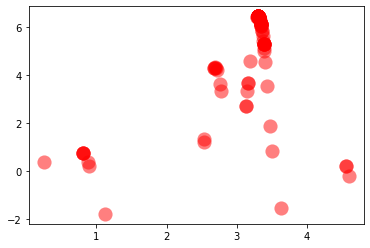

Time for Generation 141: 0.2536 seconds
Generation:  142
Max F_values:  510.36280101072845


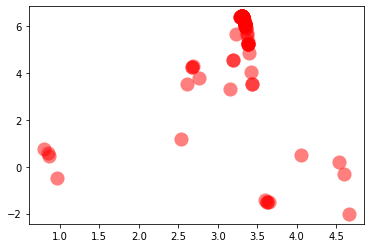

Time for Generation 142: 0.3399 seconds
Generation:  143
Max F_values:  522.0520251657629


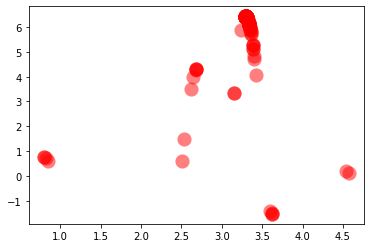

Time for Generation 143: 0.3343 seconds
Generation:  144
Max F_values:  577.4632565703491


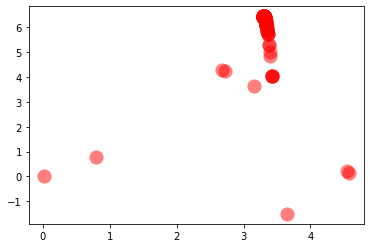

Time for Generation 144: 0.3212 seconds
Generation:  145
Max F_values:  552.5640129753162


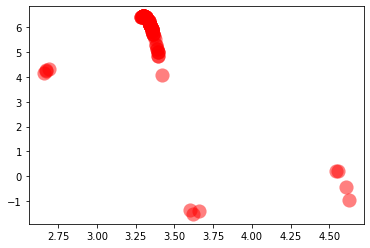

Time for Generation 145: 0.3119 seconds
Generation:  146
Max F_values:  519.7279907273088


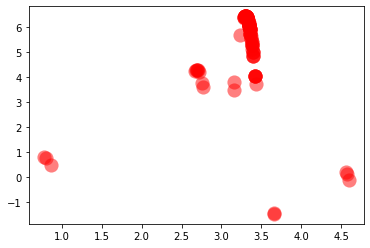

Time for Generation 146: 0.2836 seconds
Generation:  147
Max F_values:  466.99897039905375


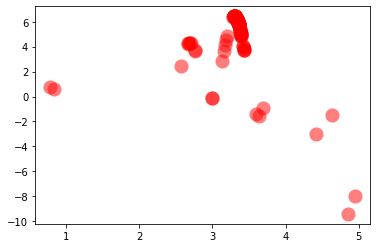

Time for Generation 147: 0.2827 seconds
Generation:  148
Max F_values:  449.14624098252125


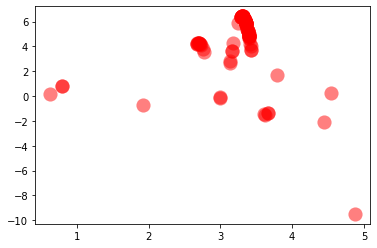

Time for Generation 148: 0.2924 seconds
Generation:  149
Max F_values:  476.445494205763


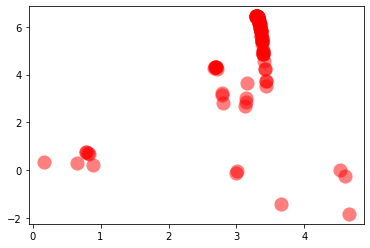

Time for Generation 149: 0.2574 seconds
Generation:  150
Max F_values:  497.66124616493084


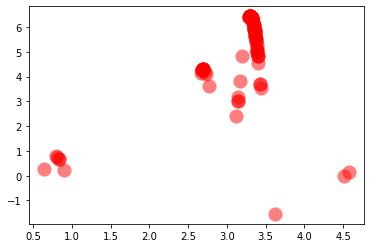

Time for Generation 150: 0.3682 seconds
Generation:  151
Max F_values:  475.9594523796831


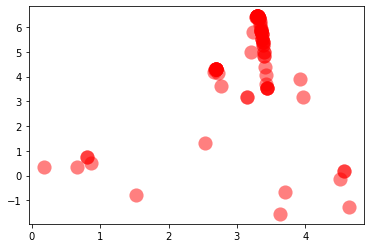

Time for Generation 151: 0.2992 seconds
Generation:  152
Max F_values:  496.11992731117374


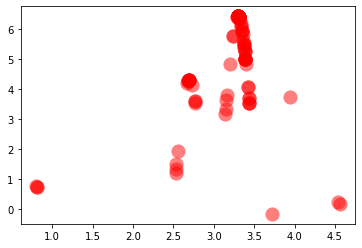

Time for Generation 152: 0.3294 seconds
Generation:  153
Max F_values:  509.4878965785068


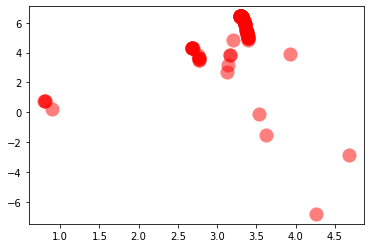

Time for Generation 153: 0.3790 seconds
Generation:  154
Max F_values:  473.0275874068459


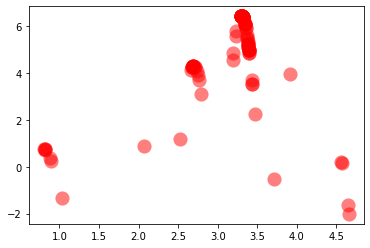

Time for Generation 154: 0.2886 seconds
Generation:  155
Max F_values:  491.3197979063378


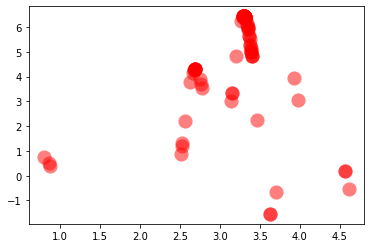

Time for Generation 155: 0.3065 seconds
Generation:  156
Max F_values:  487.11601450006407


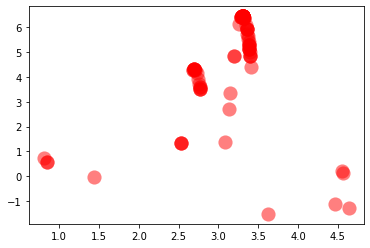

Time for Generation 156: 0.3259 seconds
Generation:  157
Max F_values:  472.3954360384417


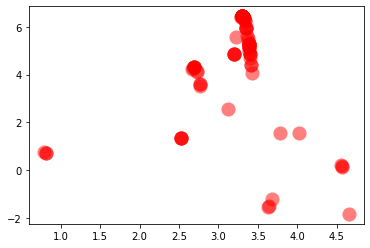

Time for Generation 157: 0.2807 seconds
Generation:  158
Max F_values:  508.87164018692937


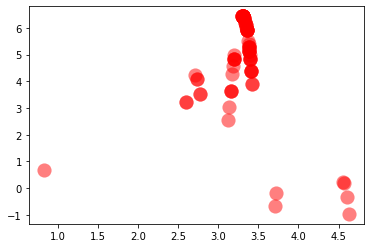

Time for Generation 158: 0.2536 seconds
Generation:  159
Max F_values:  460.3731760041358


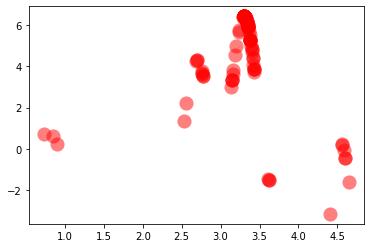

Time for Generation 159: 0.3165 seconds
Generation:  160
Max F_values:  492.7787526985032


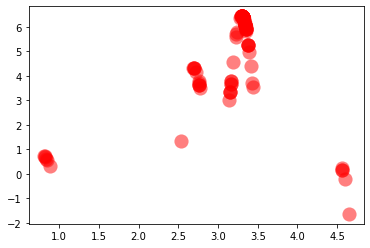

Time for Generation 160: 0.3286 seconds
Generation:  161
Max F_values:  490.73153772462683


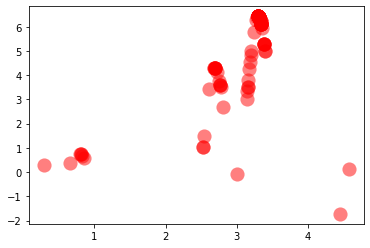

Time for Generation 161: 0.2769 seconds
Generation:  162
Max F_values:  455.3820583055758


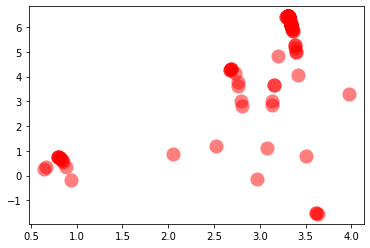

Time for Generation 162: 0.3035 seconds
Generation:  163
Max F_values:  430.44578767509245


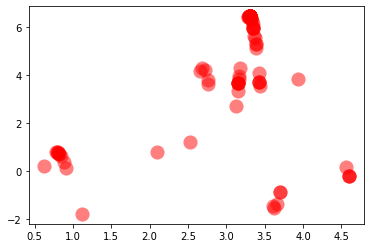

Time for Generation 163: 0.3177 seconds
Generation:  164
Max F_values:  497.518358212858


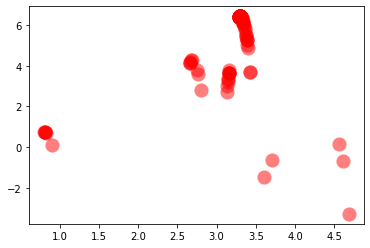

Time for Generation 164: 0.3584 seconds
Generation:  165
Max F_values:  504.46113285934507


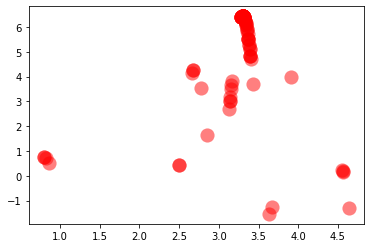

Time for Generation 165: 0.3244 seconds
Generation:  166
Max F_values:  489.7822645321983


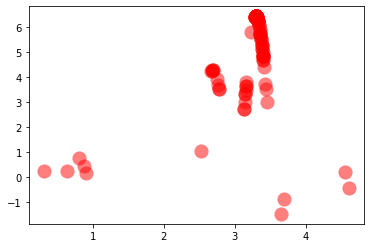

Time for Generation 166: 0.3006 seconds
Generation:  167
Max F_values:  532.116408550116


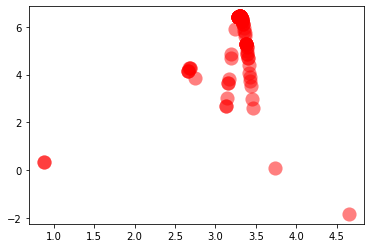

Time for Generation 167: 0.3117 seconds
Generation:  168
Max F_values:  507.62887605008575


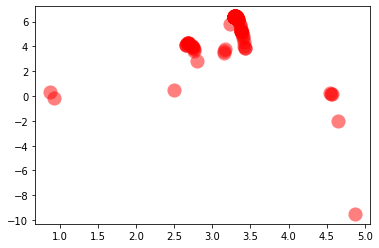

Time for Generation 168: 0.3085 seconds
Generation:  169
Max F_values:  462.4578044915864


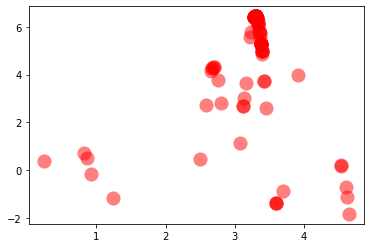

Time for Generation 169: 0.2674 seconds
Generation:  170
Max F_values:  496.810206007842


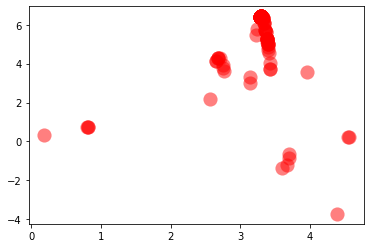

Time for Generation 170: 0.2715 seconds
Generation:  171
Max F_values:  477.0717936009944


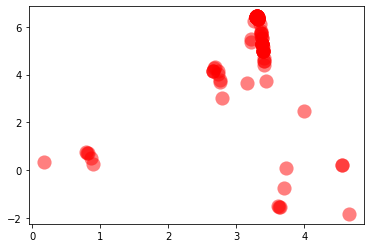

Time for Generation 171: 0.2985 seconds
Generation:  172
Max F_values:  478.6816550785487


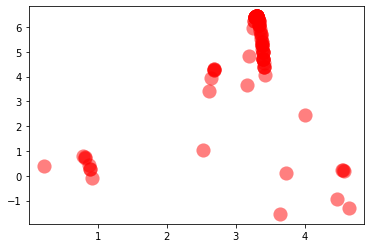

Time for Generation 172: 0.2567 seconds
Generation:  173
Max F_values:  543.6002442908847


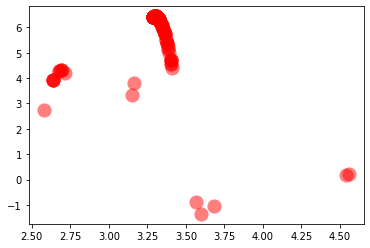

Time for Generation 173: 0.3093 seconds
Generation:  174
Max F_values:  527.3486402817628


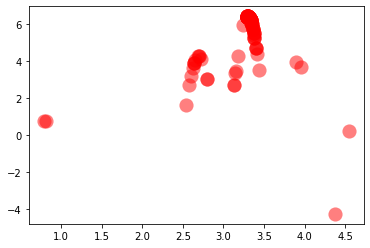

Time for Generation 174: 0.3039 seconds
Generation:  175
Max F_values:  502.3636360878313


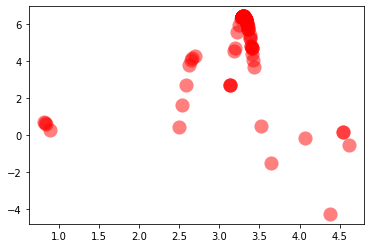

Time for Generation 175: 0.3578 seconds
Generation:  176
Max F_values:  483.61401386747286


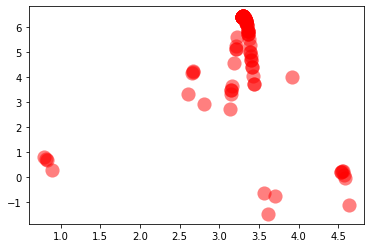

Time for Generation 176: 0.2836 seconds
Generation:  177
Max F_values:  533.3156924884863


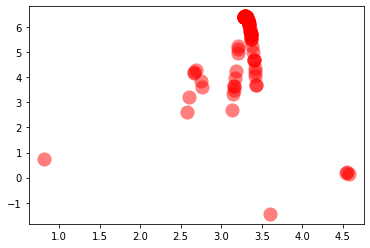

Time for Generation 177: 0.3050 seconds
Generation:  178
Max F_values:  511.61643258463494


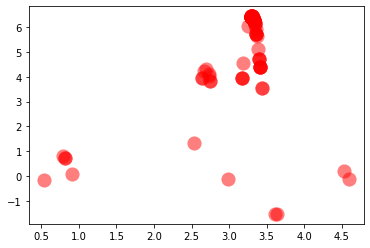

Time for Generation 178: 0.3032 seconds
Generation:  179
Max F_values:  509.31553247760036


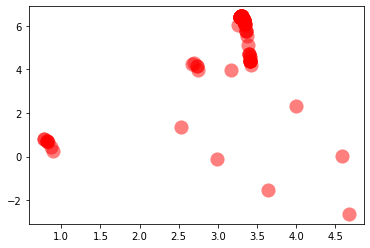

Time for Generation 179: 0.2671 seconds
Generation:  180
Max F_values:  482.66186918406726


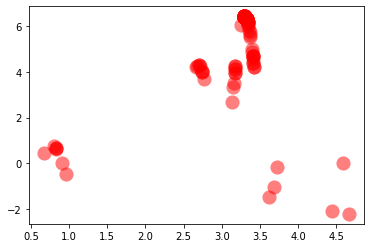

Time for Generation 180: 0.2843 seconds
Generation:  181
Max F_values:  513.6861290719385


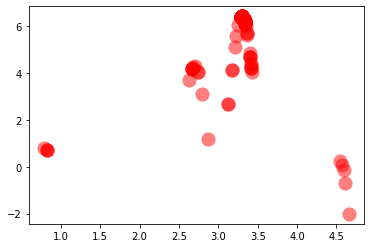

Time for Generation 181: 0.2841 seconds
Generation:  182
Max F_values:  522.5486043843808


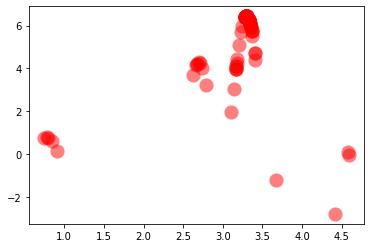

Time for Generation 182: 0.2755 seconds
Generation:  183
Max F_values:  498.17304875012513


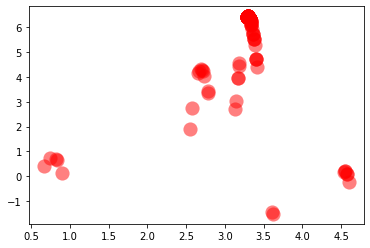

Time for Generation 183: 0.3092 seconds
Generation:  184
Max F_values:  520.2177777726333


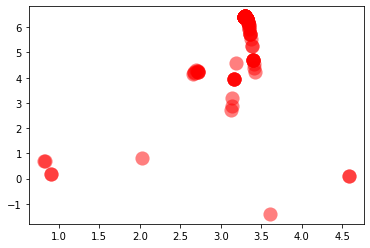

Time for Generation 184: 0.3049 seconds
Generation:  185
Max F_values:  541.5136646827194


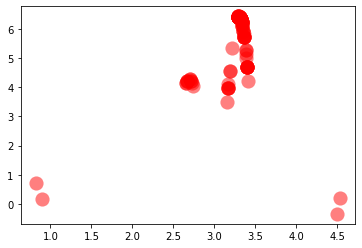

Time for Generation 185: 0.3247 seconds
Generation:  186
Max F_values:  543.7429043060314


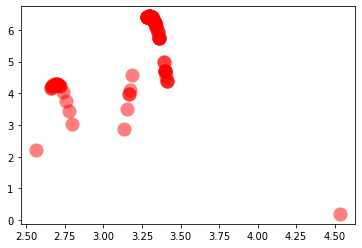

Time for Generation 186: 0.3924 seconds
Generation:  187
Max F_values:  530.880049258389


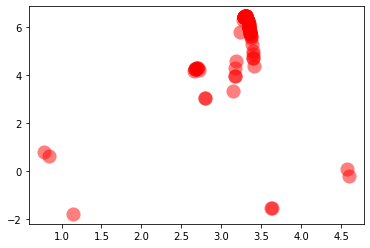

Time for Generation 187: 0.2878 seconds
Generation:  188
Max F_values:  471.08107986562317


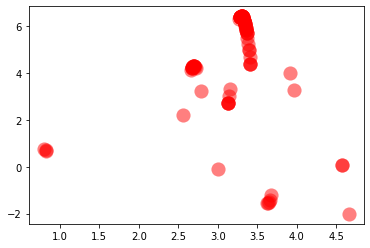

Time for Generation 188: 0.2801 seconds
Generation:  189
Max F_values:  479.56102145587573


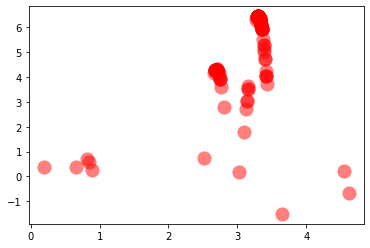

Time for Generation 189: 0.2852 seconds
Generation:  190
Max F_values:  463.04543395584017


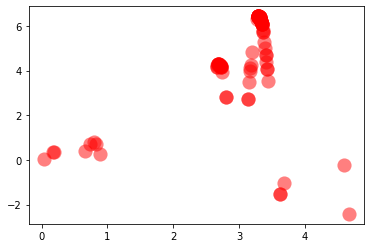

Time for Generation 190: 0.2911 seconds
Generation:  191
Max F_values:  501.4381284560816


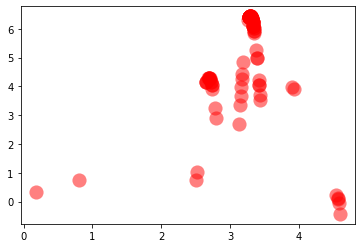

Time for Generation 191: 0.2900 seconds
Generation:  192
Max F_values:  494.1928978558387


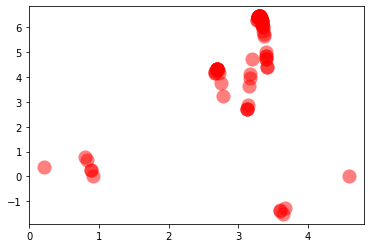

Time for Generation 192: 0.2753 seconds
Generation:  193
Max F_values:  505.4236196274486


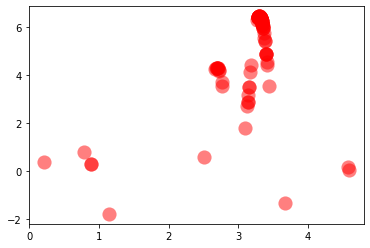

Time for Generation 193: 0.1998 seconds
Generation:  194
Max F_values:  476.681280725981


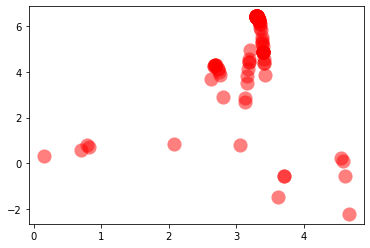

Time for Generation 194: 0.2581 seconds
Generation:  195
Max F_values:  476.8665712542243


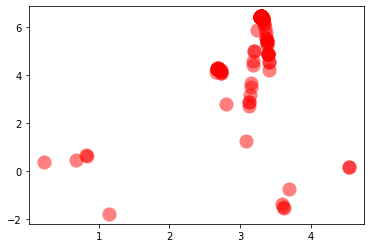

Time for Generation 195: 0.2468 seconds
Generation:  196
Max F_values:  464.89173424728165


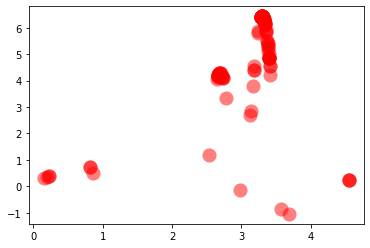

Time for Generation 196: 0.2669 seconds
Generation:  197
Max F_values:  448.9729998456033


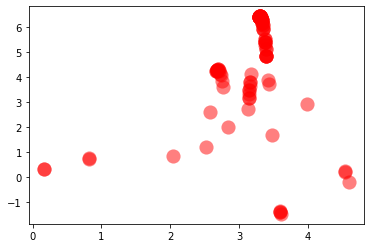

Time for Generation 197: 0.3276 seconds
Generation:  198
Max F_values:  456.5592524634208


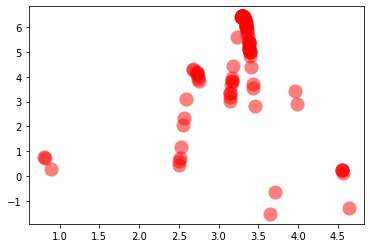

Time for Generation 198: 0.2820 seconds
Generation:  199
Max F_values:  498.6465464971195


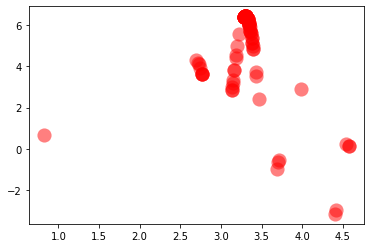

Time for Generation 199: 0.2870 seconds


([-56.67788564405704,
  -39.82581478163986,
  -27.0411155356883,
  -4.610812121737564,
  24.342915554877052,
  55.447082690658355,
  59.84487352655042,
  94.87726189835728,
  136.0629807829931,
  172.98014061156988,
  225.97531600462358,
  226.55164982948213,
  324.9405904791113,
  307.796546073798,
  331.1650702432015,
  404.36959384079563,
  459.2416070336102,
  442.3919674499424,
  407.9679362926002,
  431.6172028528256,
  429.4361510795274,
  462.704786246332,
  434.8847399988254,
  437.08982271066355,
  442.1545905515211,
  488.9917598256509,
  439.11355804284153,
  480.4127798096115,
  482.0702166292436,
  463.91202627790716,
  460.3180746142786,
  493.7563804085808,
  512.589343995616,
  485.10710814961493,
  505.50169116421074,
  489.1615614207221,
  507.38091585766466,
  471.6629391846641,
  443.6951933254597,
  413.16329597688116,
  377.8750607113079,
  458.16507301862714,
  472.2730959206955,
  460.6246035664797,
  449.98664075675333,
  426.96777347130626,
  387.981674290090

In [13]:
MUTATION_RATE = # > 0.003
performance = []
time_per_iteration = []
pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE))
GA(N_GENERATIONS,pop)

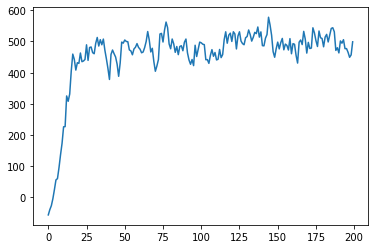

In [14]:
x = np.arange(0, N_GENERATIONS,1)
y = performance
plt.plot(x, y)

# HW 3.10 Discuss2
Based on the time taken for each generation, do you think GA is an efficient algorithm? Please compare it with traditional heuristic algorithms and modern machine learning methods in your explanation.